# Abstract

Twitter is among the most significant social media platforms. It has been widely regarded as a universal tool for spreading information, exchanging articles, and engaging with individuals all over the world. As a result, such a massive, high-velocity flow of Twitter data generated every second has the potential to be used for major analysis and interpretation.

# Introduction

Since the last decade, Twitter has grown in popularity as a microblogging and real-time social networking site. Twitter is an excellent way to stay socially connected with friends, family, and coworkers, with over 330 million active users and over 500 million posts every day [1]. An account's popularity is measured by the number of its followers. Twitter uses posts to allow users to express themselves and communicate with other users on the network (also called tweets). Each tweet has a character limit of 140 characters, including spaces. A tweet can essentially be made up of simple text, URLs, usernames, and hashtags. In this project, data from three influencer accounts is extracted, pre-processed and analyzed. The chosen technology industry related users are Tim Cook (CEO of Apple), Sundar Pichai (CEO of Google and Alphabet) and Satya Nadella (Chairman and CEO of Microsoft Corporation).

# Data Gathering and Pre-processing

### Extracting the data from Twitter

The first step to extracting data from Twitter is to apply for a developer account. Once the account is approved, we can generate the keys and tokens required to set up the connection. The connection to our Twitter App is set up using the OAuthHandler() class and its set_access_token() function. Then we call the Twitter API through the API() function. We also import the required libraries, such as tweepy, which is an open source Python package that gives us a convenient way to access the Twitter API. Tweepy includes a set of classes and methods that represent Twitter's models and API endpoints.

In [43]:
# importing the required libraries
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
import seaborn as sns
from collections import Counter
import networkx as nx
import itertools
import getpass

In [9]:
# Defining the connection credentials:
api_key = getpass.getpass(prompt='What is your api key? ')
api_secret_key = getpass.getpass(prompt='What is your api secret key? ')
access_token = getpass.getpass(prompt='What is your access token? ')
access_token_secret = getpass.getpass(prompt='What is your access token secret? ')
auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)  # it will wait till it pulls all the data

What is your api key? ········
What is your api secret key? ········
What is your access token? ········
What is your access token secret? ········


Tweepy's get_user() function returns the information of a specific user, in our case, based on their screen name.

In [10]:
# Satya Nadella
user1 = api.get_user(screen_name='satyanadella')
username1 = user1.screen_name

# Tim Cook
user2 = api.get_user(screen_name='tim_cook')
username2 = user2.screen_name

# Sundar Pichai
user3 = api.get_user(screen_name='sundarpichai')
username3 = user3.screen_name

For the extraction of the tweets and the relevant information, we implemented the function extract_tweets_as_df(username). The function accepts the influencer's username and returns a pandas dataframe with the required columns. <br>
Tweepy cursors simplify working with paginated results. Pagination is used by many Twitter API calls to return their results. Each method defaults to returning the first page, which often has a few dozen items. In order to use a cursor, we first choose the API method, the desired user and the quantity of objects we wish to fetch. The API method used with the cursor is user_timeline() which returns a collection of the most recent Tweets posted by the user indicated. The allowed types in our dataframe are strings and integers and therefore any other values will be replaced with NaN.

In [26]:
def extract_tweets_as_df(username):

    tweetCount = 300 # number of tweets to pull 
    columns = set()
    allowed_types = [str, int]
    tweets_data= []
    
    for tweet in tweepy.Cursor(api.user_timeline, id=username).items(tweetCount):
        
        status_dict = dict(vars(tweet))  # get each tweet as a dictionary 
        keys = status_dict.keys()  # get all the keys of the dictionary tweet
        single_tweet_data = {"user": tweet.user.screen_name, "author": tweet.author.screen_name}  # for adding these two columns to the df
        for k in keys:  # iterate through the keys of the dictionary's tweet
            try:
                v_type = type(status_dict[k])  # check the type of each index/value of the specific row of the tweet according to its column/key
            except:
                v_type = None  # assign it as NaN
            if v_type != None:  # check if it is not NaN and is one of the allowed types
                if v_type in allowed_types:
                    single_tweet_data[k] = status_dict[k]  # add the indexes/values
                    columns.add(k) # add the keys/columns
        tweets_data.append(single_tweet_data)  # for adding two more columns to the df

    header_cols = list(columns)  # add all the columns that we get from the tweet's JSON file of the specific user
    header_cols.append("user")  # add user colmumn
    header_cols.append("author")  # add author column
    df = pd.DataFrame(tweets_data, columns=header_cols)  # add all data with the JSON columns and the two customized ones
    return df

We now have a quick look at our dataframe to investigate the attributes of the tweets. We can see that we have a few irrelevant columns, such as URLs and id values that also appear to contain many NaN values. The author and user columns also appear to be identical. 

In [27]:
extract_tweets_as_df('tim_cook').head(5) # quick look at the dataframe

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


,quoted_status_id_str,text,id,in_reply_to_status_id,retweet_count,lang,quoted_status_id,source,source_url,id_str,in_reply_to_user_id,in_reply_to_user_id_str,favorite_count,in_reply_to_status_id_str,in_reply_to_screen_name,user,author
0,NaN,Happy Hanukkah! I wish all those who are celeb...,1465050134274785282,NaN,229,en,NaN,Twitter for iPhone,http://twitter.com/download/iphone,1465050134274785282,NaN,NaN,2901,NaN,NaN,tim_cook,tim_cook
1,NaN,"Togetherness is a gift. This Thanksgiving, I’m...",1463909273482641411,NaN,598,en,NaN,Twitter for iPhone,http://twitter.com/download/iphone,1463909273482641411,NaN,NaN,8130,NaN,NaN,tim_cook,tim_cook
2,NaN,Great to see the magic of Apple products at wo...,1463236596505841665,NaN,454,en,NaN,Twitter for iPhone,http://twitter.com/download/iphone,1463236596505841665,NaN,NaN,7739,NaN,NaN,tim_cook,tim_cook
3,NaN,Our reimagined Apple Store at The Grove brings...,1462594258158833671,NaN,412,en,NaN,Twitter for iPhone,http://twitter.com/download/iphone,1462594258158833671,NaN,NaN,6234,NaN,NaN,tim_cook,tim_cook
4,NaN,"This Transgender Day of Remembrance, I stand i...",1462159843461005313,NaN,512,en,NaN,Twitter for iPhone,http://twitter.com/download/iphone,1462159843461005313,NaN,NaN,5250,NaN,NaN,tim_cook,tim_cook


### Cleaning the data

Data cleaning is the practice of correcting or deleting corrupted, improperly formatted, incorrect, duplicate, or incomplete data from a dataset. There are numerous ways for data to be duplicated or mislabeled when merging data. Outcomes and algorithms are unreliable if data is inaccurate. It is crucial to establish a template for our data cleaning process in order to ensure that it is done correctly every time.

Our first step towards data cleaning is to handle missing or NaN values. There are a few options for these to be handled.

 - We can drop observations/columns with missing values, but this will result in the loss of information and therefore we need to be careful before doing so.
 - We can fill in missing values based on other observations; however, we risk losing data integrity because we are working with assumptions rather than actual observations.
 
We plot a heatmap in order to investigate the frequency of missing and NaN values in the dataframes.

In [28]:
def display_heatmap(user_df):
    plt.figure(figsize=(10,6))
    sns.heatmap(user_df.isnull(), cbar=False, cmap="YlGnBu")
    plt.title('Missing Data Heatmap')
    plt.show()

In [29]:
def display_null_values(user_df):
    return user_df.isnull().sum().sort_values(ascending=False)

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


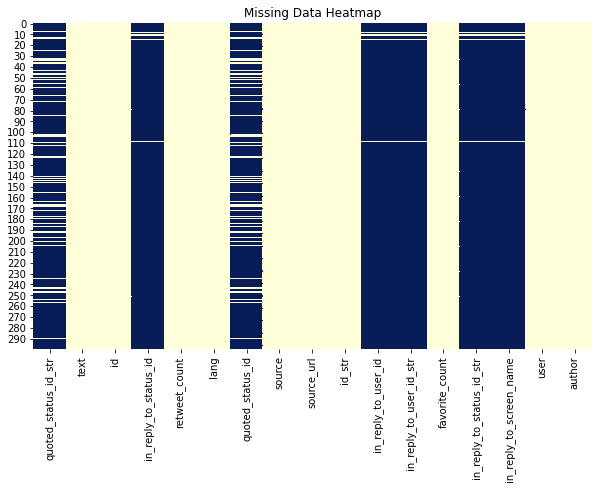

In [30]:
# Tim Cook initial dataframe

tim_cook_df = extract_tweets_as_df('tim_cook')
display_heatmap(tim_cook_df)

In [31]:
display_null_values(tim_cook_df) # display null value count for each column

in_reply_to_user_id          296
in_reply_to_status_id        296
in_reply_to_screen_name      296
in_reply_to_status_id_str    296
in_reply_to_user_id_str      296
quoted_status_id_str         249
quoted_status_id             249
user                           0
favorite_count                 0
source_url                     0
id_str                         0
text                           0
source                         0
lang                           0
retweet_count                  0
id                             0
author                         0
dtype: int64

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


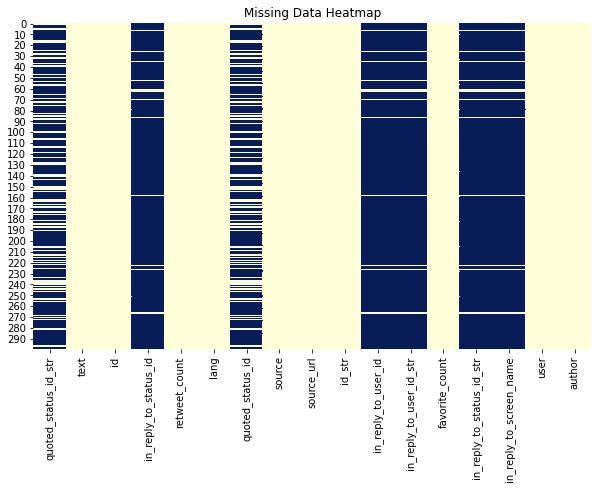

In [32]:
# Satya Nadella initial dataframe

satya_nadella_df = extract_tweets_as_df('satyanadella')
display_heatmap(satya_nadella_df)

In [33]:
display_null_values(satya_nadella_df) # display null value count for each column

in_reply_to_user_id          286
in_reply_to_status_id        286
in_reply_to_screen_name      286
in_reply_to_status_id_str    286
in_reply_to_user_id_str      286
quoted_status_id_str         209
quoted_status_id             209
user                           0
favorite_count                 0
source_url                     0
id_str                         0
text                           0
source                         0
lang                           0
retweet_count                  0
id                             0
author                         0
dtype: int64

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


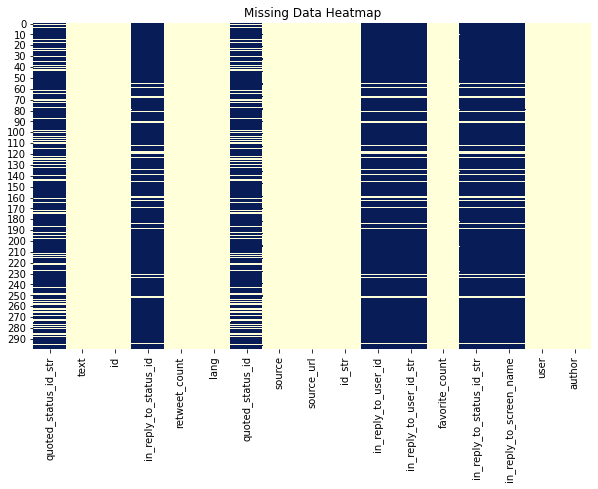

In [34]:
# Sundar Pichai initial dataframe

sundar_pichai_df = extract_tweets_as_df('sundarpichai')
display_heatmap(sundar_pichai_df)

In [35]:
display_null_values(sundar_pichai_df) # display null value count for each column

in_reply_to_user_id          278
in_reply_to_status_id        278
in_reply_to_screen_name      278
in_reply_to_status_id_str    278
in_reply_to_user_id_str      278
quoted_status_id_str         231
quoted_status_id             231
user                           0
favorite_count                 0
source_url                     0
id_str                         0
text                           0
source                         0
lang                           0
retweet_count                  0
id                             0
author                         0
dtype: int64

We observed that the columns with id values contain a lot of missing values and are also irrelevant to our analysis. Therefore, we decided that it is better to drop them.

We will also check whether the author and user columns are identical.

In [36]:
tim_cook_df['author'].equals(tim_cook_df['user'])

True

In [37]:
satya_nadella_df['author'].equals(satya_nadella_df['user']) 

True

In [38]:
sundar_pichai_df['author'].equals(sundar_pichai_df['user'])

True

The two columns are identical and therefore one of them needs to be dropped as it serves no purpose. We implemented a function called data_preprocessing(username) that accepts the username, drops the columns discussed earlier and returns the updated dataframe.

In [40]:
# nested function
def data_preprocessing(username):
    df = extract_tweets_as_df(username)  # extract the data through the function
    
    # drop columns that are irrelevant and also contain a lot of missing values
    df.drop(columns=['author','source_url', 'in_reply_to_screen_name', 'in_reply_to_user_id', 'in_reply_to_status_id', 'source', 'quoted_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id_str', 'quoted_status_id_str', 'id_str'], axis=1, inplace=True)
    
    # reorder columns 
    column_names = ["user", "lang", "id", "favorite_count", "retweet_count", "text"]
    df = df.reindex(columns=column_names)
    return df

In [41]:
# Satya Nadella
satya_nadella_df1 = data_preprocessing(username1) # get the cleaned data frame
display(satya_nadella_df1) # display the data frame

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


,user,lang,id,favorite_count,retweet_count,text
0,satyanadella,en,1463230555013607428,734,129,Our new datacenter region in Belgium will help...
1,satyanadella,en,1460658416662171651,1491,239,"Today, we are announcing the launch of our new..."
2,satyanadella,en,1460321808712798212,2894,313,"For 20 years, Xbox has built a community of jo..."
3,satyanadella,en,1459223173744902144,0,21,RT @judsonalthoff: Excited to announce we’re n...
4,satyanadella,en,1458815269971714048,872,111,"This Veterans Day, we recognize the service an..."
...,...,...,...,...,...,...
295,satyanadella,en,1267591675263647745,0,873,"RT @Microsoft: At this time, we will be using ..."
296,satyanadella,en,1267554828516913154,0,1460,"RT @Microsoft: At this time, we will be using ..."
297,satyanadella,en,1267492314584236032,7333,1819,There is no place for hate and racism in our s...
298,satyanadella,en,1266095276558741504,0,3152,RT @Xbox: Xbox Series X is the most compatible...


In [42]:
# Tim Cook
tim_cook_df1 = data_preprocessing(username2) # get the cleaned data frame
display(tim_cook_df1) # display the data frame

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


,user,lang,id,favorite_count,retweet_count,text
0,tim_cook,en,1465050134274785282,2906,229,Happy Hanukkah! I wish all those who are celeb...
1,tim_cook,en,1463909273482641411,8130,598,"Togetherness is a gift. This Thanksgiving, I’m..."
2,tim_cook,en,1463236596505841665,7739,454,Great to see the magic of Apple products at wo...
3,tim_cook,en,1462594258158833671,6234,412,Our reimagined Apple Store at The Grove brings...
4,tim_cook,en,1462159843461005313,5250,512,"This Transgender Day of Remembrance, I stand i..."
...,...,...,...,...,...,...
295,tim_cook,en,1217976239689850880,1394,188,There are countless ways to make a difference....
296,tim_cook,en,1216795050484490240,8523,812,“The Ultra Wide camera brings a whole new expe...
297,tim_cook,en,1214045061761003520,5469,369,Congratulations to all of tonight’s @GoldenGlo...
298,tim_cook,en,1212407624144019456,14730,2011,There is opportunity in every new beginning. I...


In [43]:
# Sundar Pichai
sundar_pichai_df1 = data_preprocessing(username3) # get the cleaned data frame
display(sundar_pichai_df1) # display the data frame

Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id
Unexpected parameter: id


,user,lang,id,favorite_count,retweet_count,text
0,sundarpichai,en,1465100457563414528,184,16,Happy Hanukkah to everyone who is celebrating!...
1,sundarpichai,en,1461603223333076992,74959,7041,"What a legacy, one of my favorites to watch ev..."
2,sundarpichai,en,1461214788638285829,2047,211,"At #GoogleForIndia, we shared how we're suppor..."
3,sundarpichai,en,1461103836358230016,948,76,To celebrate the heritage and history of Indig...
4,sundarpichai,en,1461072106221830146,571,52,Great to sit down (in person!) with @emilychan...
...,...,...,...,...,...,...
295,sundarpichai,en,1248092674923450368,507,10,@KatieS @herb_jacobs Sorry for your loss Katie...
296,sundarpichai,en,1247577702397181954,2129,382,"For students with disabilities, the transition..."
297,sundarpichai,en,1247197100120530944,8804,1415,"Starting today, we're launching a #GoogleDoodl..."
298,sundarpichai,en,1246116733204619267,3622,934,We've published an early release of our #COVID...


# Exploratory Data Analysis (EDA)

The primary goal of EDA is to assist in the analysis of data. It can aid in the detection of evident errors, as well as a better understanding of data patterns, the detection of outliers or unusual events, and the discovery of interesting relationships between variables. It reveals trends, patterns, and connections that might otherwise go unnoticed.

Firstly, to make the exploratory data analysis simpler, we merge the three dataframes into one using the pandas concat() function.

In [44]:
# merge the dfs
frames = [tim_cook_df1, sundar_pichai_df1,satya_nadella_df1] # specify the frames needed to be merged
df = pd.concat(frames) # concat the three dataframes
df # display the resulting dataframe

,user,lang,id,favorite_count,retweet_count,text
0,tim_cook,en,1465050134274785282,2906,229,Happy Hanukkah! I wish all those who are celeb...
1,tim_cook,en,1463909273482641411,8130,598,"Togetherness is a gift. This Thanksgiving, I’m..."
2,tim_cook,en,1463236596505841665,7739,454,Great to see the magic of Apple products at wo...
3,tim_cook,en,1462594258158833671,6234,412,Our reimagined Apple Store at The Grove brings...
4,tim_cook,en,1462159843461005313,5250,512,"This Transgender Day of Remembrance, I stand i..."
...,...,...,...,...,...,...
295,satyanadella,en,1267591675263647745,0,873,"RT @Microsoft: At this time, we will be using ..."
296,satyanadella,en,1267554828516913154,0,1460,"RT @Microsoft: At this time, we will be using ..."
297,satyanadella,en,1267492314584236032,7333,1819,There is no place for hate and racism in our s...
298,satyanadella,en,1266095276558741504,0,3152,RT @Xbox: Xbox Series X is the most compatible...


We check again for missing values on the resulting dataframe to make sure that all the missing values have been cleaned. 
  As shown in the heatmap below, the resulting dataframe does not contain any missing values.

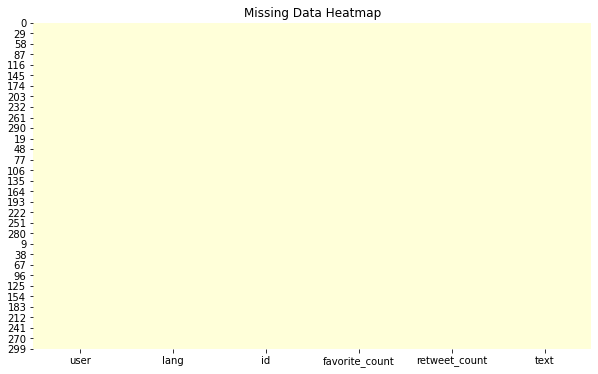

In [46]:
display_heatmap(df) # display missing data heatmap

### User Followers

The followers of each user are then compared, with Tim Cook having the most followers among the three influencers, as shown in the bar chart below.

In [158]:
# Satya Nadella's follower count
user1.followers_count

2690058

In [155]:
# Tim Cook's follower count
user2.followers_count

13143756

In [156]:
# Sundar Pichai's follower count
user3.followers_count

4079621

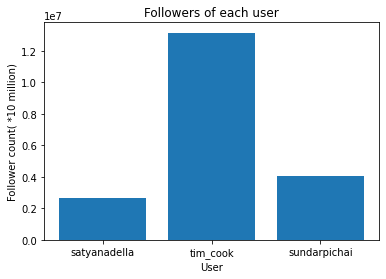

In [13]:
# compare the 3 accounts according to their twitter followers
usernames = [username1, username2, username3]
followers = [user1.followers_count, user2.followers_count, user3.followers_count]

plt.bar(usernames,followers)
plt.title('Followers of each user')
plt.xlabel('User')
plt.ylabel('Follower count( *10 million)')
plt.show()

### Mean likes and retweets

The mean liked and retweeted statuses of each user are calculated using the function calculate_mean_likes_and_retweets(username) and are then visualized using a bar chart. We can see that Tim Cook has on average the most likes and retweets. 

In [ ]:
def calculate_mean_likes_and_retweets(username):
    user=df.loc[(df['user'] == username)] # retrieve data values of user Satya Nadella
    user_fav_mean  = user["favorite_count"].mean() # calculate mean likes
    user_rt_mean = user["retweet_count"].mean() #calculate mean retweets
    return user_fav_mean, user_rt_mean

In [52]:
# retrieve data values of user Satya Nadella
# calculate mean likes and mean retweets

satya_fav_mean, satya_rt_mean =  calculate_mean_likes_and_retweets(username1) # calculate mean likes

In [53]:
# retrieve data values of user Tim Cook
# calculate mean likes and mean retweets

tim_fav_mean, tim_rt_mean =  calculate_mean_likes_and_retweets(username2) # calculate mean likes

In [54]:
# retrieve data values of user Sundar Pichai
# calculate mean likes and mean retweets

sundar_fav_mean, sundar_rt_mean =  calculate_mean_likes_and_retweets(username3) # calculate mean likes

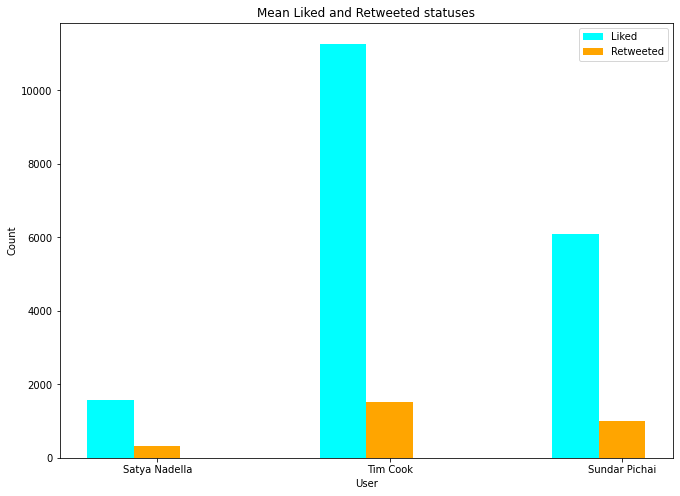

In [55]:
x = np.arange(3)
y1 = [satya_fav_mean, tim_fav_mean, sundar_fav_mean]
y2 = [satya_rt_mean, tim_rt_mean, sundar_rt_mean]
width = 0.2

# plot data in grouped manner of bar type
plt.rcParams["figure.figsize"] = (11,8) # set the size of the figure
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['Satya Nadella', 'Tim Cook', 'Sundar Pichai']) # x-axis ticks
plt.xlabel("User") # x-axis label
plt.ylabel("Count") # y-axis label
plt.legend(["Liked", "Retweeted"])
plt.title('Mean Liked and Retweeted statuses')
plt.show()

### Most Liked Tweets

Next in our analysis, we retrieve the 50 most liked tweets among our influencers. As shown below, the most liked tweet belongs to Sundar Pichai. However, Tim Cook appears to have a lot of tweets in the top 50. An initial conclusion is that although Tim Cook is the most followed influencer, he is not the author of the most liked tweet between the three users. Interestingly, Tim Cook and Sundar Pichai's tweets are fighting for the top five spots of the most liked tweets, which is rather unexpected seeing as Cook's follower count is 31% higher than Pichai's follower count. Without the EDA results, one would assume that Tim Cook owns all of the top most liked tweets. Further analysis is required in order to draw stronger conclusions. 

In [56]:
#find 50 most liked tweets and who they belong to
likes_df = df.nlargest(50,'favorite_count') # find the largest 50 favorite counts
likes_df= likes_df[["user", "favorite_count","text"]] # keep only the columns we are interested in
likes_df.sort_values(by=['favorite_count'], ascending=False) # sort in descending order
likes_df # display the dataframe

,user,favorite_count,text
169,sundarpichai,306688,One of the greatest test series wins ever. Con...
137,tim_cook,111247,We believe users should have the choice over t...
165,sundarpichai,101368,Welcome to my hometown @englandcricket wish wa...
182,tim_cook,99154,Good morning! T-minus 6 hours! #AppleEvent
233,sundarpichai,98492,Today at #GoogleForIndia we announced a new $1...
168,satyanadella,87076,Last hour of the last day of the last test. Te...
1,sundarpichai,74959,"What a legacy, one of my favorites to watch ev..."
247,sundarpichai,70649,Immigration has contributed immensely to Ameri...
265,tim_cook,70227,Proud to share we’ve been able to source 10M m...
170,tim_cook,68007,“A great soul never dies. It brings us togethe...


To further investigate the 50 most liked tweets, we plot a bar chart showing how many of each user's tweets are in the top 50 list. We observe that Tim Cook has more than 35 tweets among the 50 most liked and Satya Nadella has less than 5.

Text(0, 0.5, 'Appearances')

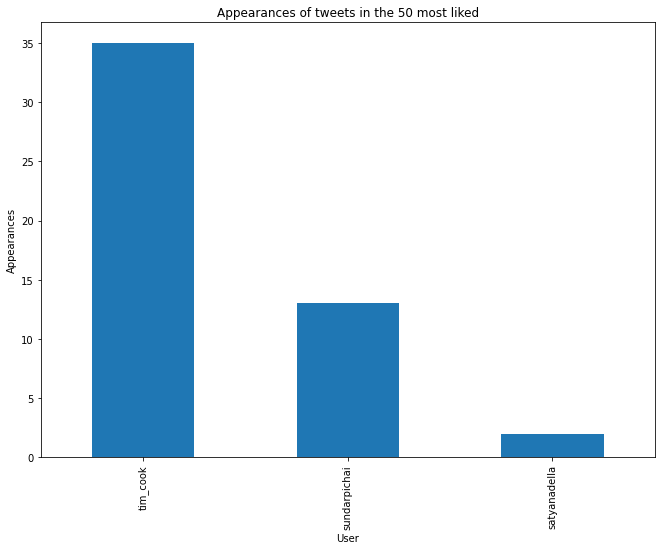

In [57]:
# check how many user's tweets appear in the top 50 list
likes_df['user'].value_counts().plot.bar()
plt.title('Appearances of tweets in the 50 most liked')
plt.xlabel('User')
plt.ylabel('Appearances')

### Most Retweeted Statuses

Similarly, we explore the 50 most retweeted statuses. Sundar Pichai is on the top of the list with a status that reached 58007 retweets. As previously observed, Sundar Pichai's tweets rise in popularity even though he does not have the most followers.

In [58]:
#find 50 most retweeted tweets and who they belong to
retweets_df = df.nlargest(50,'retweet_count') # find the largest 50 retweet counts
retweets_df= retweets_df[["user", "retweet_count","text"]] # keep only the columns we are interested in
retweets_df.sort_values(by=['retweet_count'], ascending=False) # sort in descending order
retweets_df # display the dataframe

,user,retweet_count,text
199,sundarpichai,58007,RT @ruth_franklin: According to Jewish traditi...
271,tim_cook,40246,"RT @repjohnlewis: 55 years ago today, we were ..."
169,sundarpichai,39011,One of the greatest test series wins ever. Con...
233,sundarpichai,22964,Today at #GoogleForIndia we announced a new $1...
137,tim_cook,16234,We believe users should have the choice over t...
265,tim_cook,11267,Proud to share we’ve been able to source 10M m...
182,tim_cook,11055,Good morning! T-minus 6 hours! #AppleEvent
26,tim_cook,11039,“People with passion can change the world for ...
247,sundarpichai,10995,Immigration has contributed immensely to Ameri...
256,tim_cook,10825,Apple is dedicated to supporting the worldwide...


Again, Tim Cook appears the most in the top 50 retweeted statuses, as shown in the bar chart below.

Text(0, 0.5, 'Appearances')

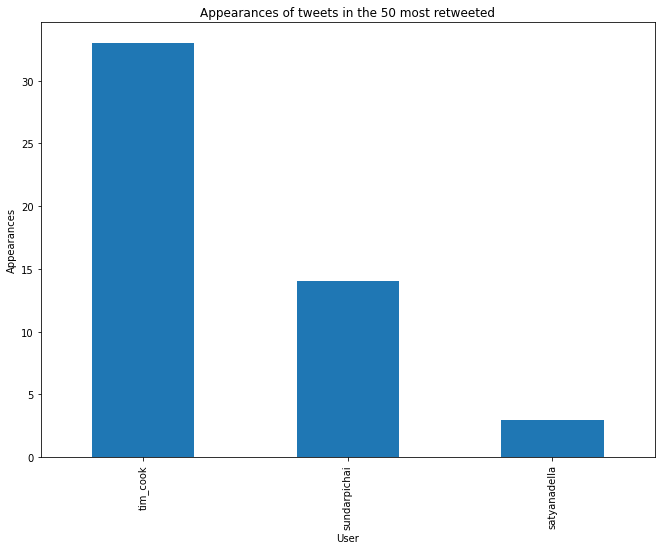

In [59]:
# check how many user's tweets appear in the top 50 list
retweets_df['user'].value_counts().plot.bar()
plt.title('Appearances of tweets in the 50 most retweeted')
plt.xlabel('User')
plt.ylabel('Appearances')

### Which is the most successful account?

In order to answer this question, we take into account the following variables:

- Number of followers
- Most liked tweets
- Most retweeted tweets

Tim Cook's account appears to be the most successful. As discussed earlier, Tim Cook owns the majority of the most liked and retweeted tweets, which is expected as he has the most followers and therefore reaches a significantly larger audience compared to Sundar Pichai and Satya Nadella.

### Original Tweets VS Retweets

We will then explore whether our users produce original tweets or are mostly retweeting. To do that, we implemented the function get_retweets(username). The function calculates the total original tweets and retweets based on the retweeted_status, a property that only a retweet contains. If retweeted_status exists, that means that the tweet is a retweet and the retweet count is incremented by one. If retweeted_status does not exist, an attribute error is raised. We catch this error with exception handling and the original tweet counter is incremented. The function then plots a pie chart to visualize our information. <br>
We come to the conclusion that all three of our users are mostly producing original tweets.

In [60]:
def get_retweets(username):
    # initialise the counters
    rt_count=0 # retweet counter
    nrt_count=0 # original tweet counter

    newdf=df.loc[(df['user'] == username)]  # filter which user we are interested in

    for i in newdf.id:
        status = api.get_status(i)  # get the tweet based on the id
        try:
            if status.retweeted_status: # if the attribute retweeted_status exists, the tweet is a retweet
                 rt_count=rt_count+1 # increment the counter
        except AttributeError:  # if the attribute retweeted_status doesn't exist, it means the tweet is original
                 nrt_count=nrt_count+1


    labels= ['Retweets', 'Original Tweets']
    colors=['blue', 'yellow']
    sizes= [rt_count,nrt_count]
    plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
    plt.title('Original tweets and retweets percentage of ' + username)
    plt.axis('equal')
    plt.show()

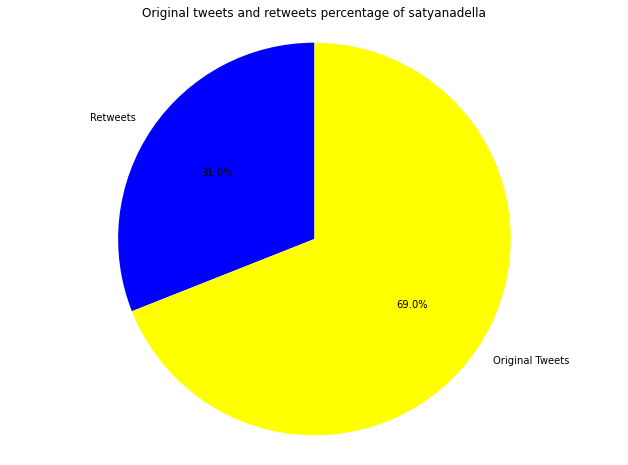

In [61]:
# get retweets for Satya Nadella

get_retweets(username1)

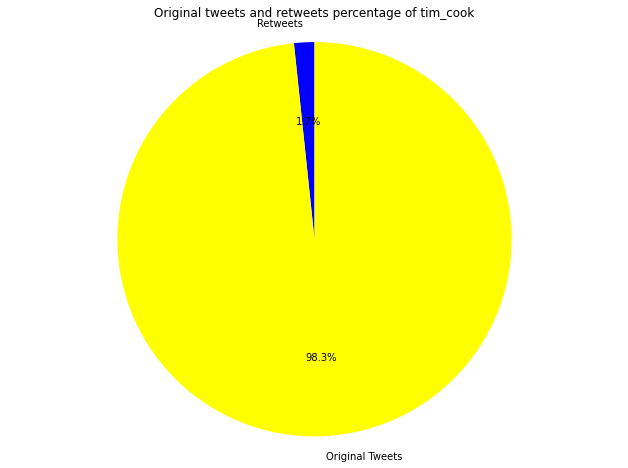

In [62]:
# get retweets for Tim Cook

get_retweets(username2)

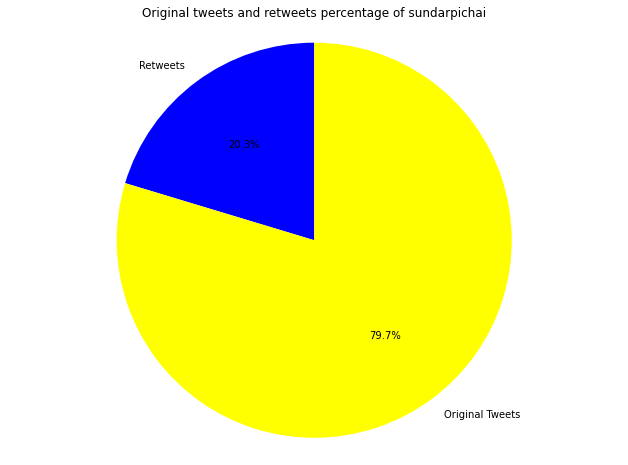

In [63]:
# get retweets for Sundar Pichai

get_retweets(username3)

### Favorite Users

Afterwards, we explore who are the favourite users of the three influencers. The get_user_favorites() function is implemented. Tweepy's get_favorites() function returns the favorite statuses of the specified user. Our function adds all the authors of the favorite statuses to a list. The list is then converted to a set in order to avoid duplicates and the set containing all the favorite users is returned by the function.

In [65]:
# function to retrieve the favourite user's of each influencer
def get_user_favorites(username):
    favorite_users=[]
    # getting favorite satuses
    favorite_statuses = api.get_favorites(screen_name=username) # get the favorite statuses
  
    # printing the screen names of the author's of the statuses
    for status in favorite_statuses:
        favorite_users.append(status.user.screen_name) # add user (author of the status) to the list
    favorite_users = set(favorite_users) # convert list to a set to remove duplicates
    return favorite_users

In [66]:
# Satya Nadella's favorite users
satya_nadella_favorites = get_user_favorites(username1)
satya_nadella_favorites

{'AntonioNeri_HPE',
 'Azure',
 'Carmine_DiSibio',
 'MSFTImagine',
 'MSFTnews',
 'MichaelDell',
 'RoKhanna',
 'XboxWire',
 '_MAnant',
 'akipman',
 'cristianoamon',
 'erichorvitz',
 'hansvestberg',
 'manikgupta',
 'nitya',
 'panos_panay',
 'tmyerson'}

In [67]:
# Tim Cook's favorite users
tim_cook_favorites = get_user_favorites(username2)
tim_cook_favorites

{'AuburnFootball',
 'BenBajarin',
 'Malala',
 'MarleeMatlin',
 'NightTigerFTW',
 'ResusciTech',
 'RyanZohoury',
 'SahilBloom',
 'TommyKornMD',
 'YNB',
 'austinmann',
 'briantong',
 'espn',
 'faythebest',
 'jimcramer',
 'kenleyjansen74',
 'richontech',
 'sanchezcastejon'}

In [68]:
# Sundar Pichai's favorite users
sundar_pichai_favorites = get_user_favorites(username3)
sundar_pichai_favorites

{'FiveThirtyEight',
 'JasonOGrady',
 'MKBHD',
 'Will4Planet',
 'backlon',
 'benedictevans',
 'btaylor',
 'chr1sa',
 'demishassabis',
 'harrymccracken',
 'inafried',
 'lexfridman',
 'mgsiegler',
 'mhelft',
 'mmasnick',
 'paulg',
 'waltmossberg'}

In order to check whether our influencers have any common favorite users, we use python's intersection() method. The method returns a set that contains the items that exist in all the sets we wish to compare. The method returned an empty set which means that there are no common favorite users among the three influencers.

In [70]:
tim_cook_favorites.intersection(sundar_pichai_favorites, satya_nadella_favorites)

set()

Aditionally, we check in what languages our influencers produce their tweets. As shown in the bar chart below, most tweets are written in English. One tweet was written in an undefined laguage, and another one in French.

In [159]:
df['lang'].value_counts() # count the values of the laguages used

en     898
und      1
fr       1
Name: lang, dtype: int64

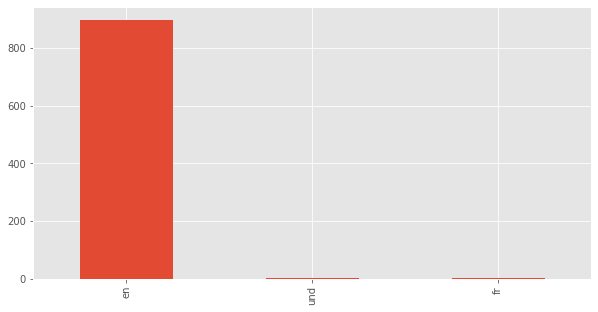

In [160]:
df['lang'].value_counts().plot.bar() # check the languages of the tweets produced in a bar chart

### Correlation between likes and retweets

Following, we want to see if there is any correlation between the amount of likes and the amount of the retweets. To do that, we used a scatter plot on which we plotted a regression line to make the visualization easier to understand. The line showed that the two variables have a linear relationship. The slope of the line also showed that this relationship is positive. This means that as one variable increases, the other variable increases as well. 

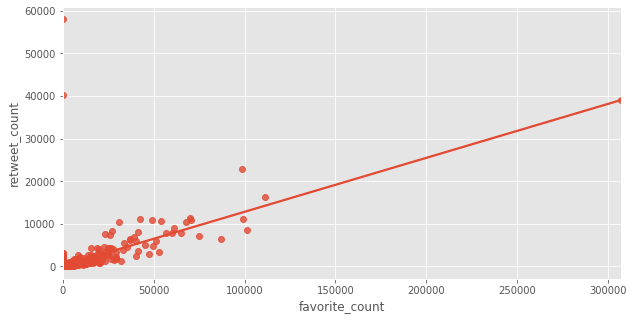

In [161]:
# scatter plot with a regression line for the favourite_count and retweet_count
sns.regplot(x="favorite_count", y="retweet_count", ci=None,data=df);

### Most Used Hashtags

Next, we want to investigate the hashtags used in the influencers' tweets. The practice of prefixing a word or an unspaced sentence in a tweet with the "#" symbol to highlight the primary concept or substance of that tweet is known as hashtagging. Twitter automatically groups together all tweets with the same hashtags to aid in topic-specific classification and searches. The first step to that is to create a list of all the tweets.

In [162]:
# create a list of all the tweets
texts = df['text']
texts

0      Happy Hanukkah! I wish all those who are celeb...
1      Togetherness is a gift. This Thanksgiving, I’m...
2      Great to see the magic of Apple products at wo...
3      Our reimagined Apple Store at The Grove brings...
4      This Transgender Day of Remembrance, I stand i...
                             ...                        
295    RT @Microsoft: At this time, we will be using ...
296    RT @Microsoft: At this time, we will be using ...
297    There is no place for hate and racism in our s...
298    RT @Xbox: Xbox Series X is the most compatible...
299    RT @jennylayfluffy: Time flies! Today marks th...
Name: text, Length: 900, dtype: object

We will then iterate through all the tweets and add to a list all the words starting with the character "#". A function valid_hashtags(mentioned_username) is also implemented in order to remove any characters that occur after the mentioned name (e.g , ! ? ) that do not belong to the username. We also included a counter to get the amount of the hashtags used.

In [164]:
def valid_hashtags(mentioned_username):
    counter = 0
    
    for char_index in mentioned_username:
        is_letter = char_index.isalpha() # check if each character is a letter
        # if nex character is neither a character or a '_' => it means that's the username
        if is_letter == True or char_index == '_':
            counter = counter + 1
        else: 
            break
    print(mentioned_username[:counter])
    # return the username of the user    
    return mentioned_username[:counter]

In [165]:
# retrieve all the hashtags used from users in their tweets
hashtag_count=0
hashtags=[]
for sub in texts:
    temp=sub.split() # splitting the phrases
    for ele in temp:
        if ele[0]=='#': # checking for words starting with a hashtag (#)
            hashtag_count=hashtag_count+1
            hashtags.append(valid_hashtags(ele[1:len(ele)+1])) # add them to a list to handle them easier

ShotOniPhone
AppleEvent
WorldMentalHealthDay
ShotOniPhone
TheMorningShow
ShotOniPhone
WorldPhotographyDay

WWDC
EidAlFitr
InternationalNursesDay
MothersDay
AppleEvent
InternationalWomensDay
LunarNewYear
DataPrivacyDay
ParisAgreement
IDPD
WorldAIDSDay
AppleEvent
ShotOniPhone
ChicaIdeal
AppleEvent
CVAA
ClimateAction
AppleEvent
WorldEmojiDay
FourthOfJuly
WWDC
WWDC
WWDC
GAAD
TransDayOfVisibility
ShotOniPhone
PresidentsDay
HappyValentinesDay
BlackHistoryMonth
Nightmode
shotoniPhone
GoogleForIndia
GoogleDoodle
GoogleOrgImpactChallenge
DearEarth
WSJTechLive
GoogleCloudNext
Google
shorts
SearchOn
GoogleAI
GoogleLens
WaymoDriver
SearchOn
GoogleAI
Dreamers
Tokyo
PermissiontoDance
Shorts
GoogleDoodle
Unity
ENGITA
GoogleIO
Juneteenth
EURO
GoogleIO
GoogleIO
GoogleIO
GoogleIO
WNBAChangemaker
MarsHelicopter
GoogleIO
Holi
cr
GoogleForIndia
WomenWill
LunarNewYear
INDvsAUS
AlphaFold
GoogleDoodle
Pixel
GoogleAI
LaunchNightIn
TIME
DoodleforGoogle
HispanicHeritageMonth
GoogleCloudNext
GoogleForIndia
DACA
A

Only 129 hashtags were used in a total number of 900 tweets. It appears that the users do not use hashtags in their tweets very often. Only 14.3% of the tweets contained a hashtag.

In [167]:
hashtag_count # get the total hashtags number

129

In [168]:
129/900*100 # percentage of the hashtags used in the tweets

14.333333333333334

In [79]:
hashtags

['ShotOniPhone',
 'AppleEvent',
 'WorldMentalHealthDay',
 'ShotOniPhone',
 'TheMorningShow',
 'ShotOniPhone',
 'WorldPhotographyDay',
 '',
 'WWDC',
 'EidAlFitr',
 'InternationalNursesDay',
 'MothersDay',
 'AppleEvent',
 'InternationalWomensDay',
 'LunarNewYear',
 'DataPrivacyDay',
 'ParisAgreement',
 'IDPD',
 'WorldAIDSDay',
 'AppleEvent',
 'ShotOniPhone',
 'ChicaIdeal',
 'AppleEvent',
 'CVAA',
 'ClimateAction',
 'AppleEvent',
 'WorldEmojiDay',
 'FourthOfJuly',
 'WWDC',
 'WWDC',
 'WWDC',
 'GAAD',
 'TransDayOfVisibility',
 'ShotOniPhone',
 'PresidentsDay',
 'HappyValentinesDay',
 'BlackHistoryMonth',
 'Nightmode',
 'shotoniPhone',
 'GoogleForIndia',
 'GoogleDoodle',
 'GoogleOrgImpactChallenge',
 'DearEarth',
 'WSJTechLive',
 'GoogleCloudNext',
 'Google',
 'shorts',
 'SearchOn',
 'GoogleAI',
 'GoogleLens',
 'WaymoDriver',
 'SearchOn',
 'GoogleAI',
 'Dreamers',
 'Tokyo',
 'PermissiontoDance',
 'Shorts',
 'GoogleDoodle',
 'Unity',
 'ENGITA',
 'GoogleIO',
 'Juneteenth',
 'EURO',
 'GoogleIO'

We use a bar chart to visualize which hashtags are mostly used by our users. The hashtag #COVID is mostly used thoughout the latest tweets.

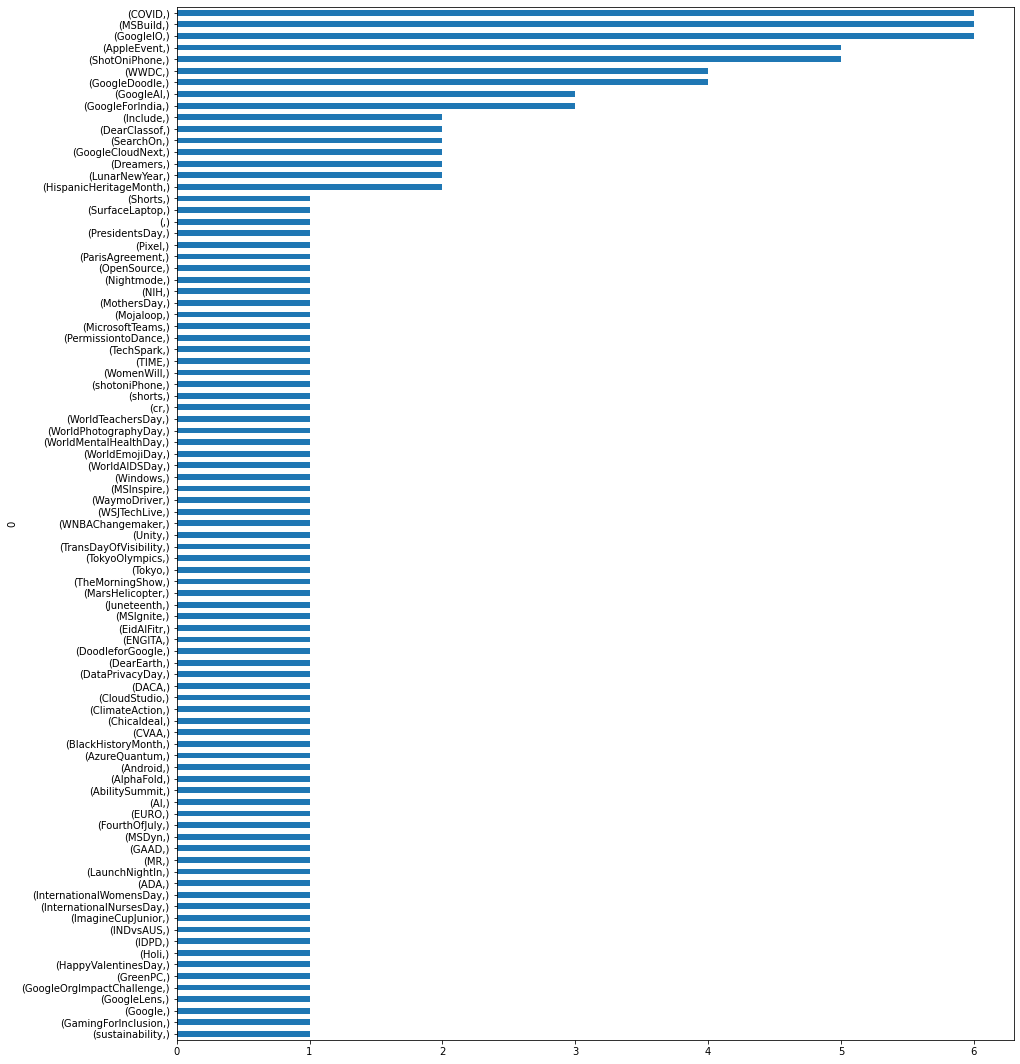

In [85]:
hashtags = pd.DataFrame(hashtags) # convert the list into a panda dataframe in order to visualize it with a bar plot
hashtags.value_counts().plot.barh(figsize=(15,19))
plt.gca().invert_yaxis()

### Most Mentioned Users

Similarly, we want to retrieve the most mentioned accounts of each user, so we iterate through the tweets and add to a list every word that begins with the character "@". This is implemented in the function get_mentioned_users(username) that returns a list of all the mentioned users. 

In [86]:
def valid_mentioned_username(mentioned_username):
    counter = 0
    
    for char_index in mentioned_username:
        is_letter = char_index.isalpha() # check if each character is a letter
        # if nex character is neither a character or a '_' => it means that's the username
        if is_letter == True or char_index == '_':
            counter = counter + 1
        else: 
            break
    print(mentioned_username[:counter])
    # return the username of the user    
    return mentioned_username[:counter]

In [87]:
def get_mentioned_users(username):
    texts = df.loc[(df['user'] == username)]  # filter which user we are interested in
    texts2 = texts['text'] #keep only the text part
    mentioned_users=[]
    for sub in texts2:
        temp=sub.split() # splitting the phrases
        for ele in temp:
            if ele[0]=='@': # checking for words starting with a @
                mentioned_users.append(valid_mentioned_username(ele[1:len(ele)+1])) # add them to a list to handle them easier
    return mentioned_users

We then run the function separately for each user and plot a bar chart of the results.

In [88]:
sundar_mentioned=get_mentioned_users('sundarpichai') # get the mentioned users of Sundar Pichai

emilychangtv
nealmohan
YouTube
ThomasOrTK
aaneama
hiringourheroes
KermitTheFrog
YouTube
murraymatt
ThomasOrTK
ThomasOrTK
harrymccracken
GoogleCloud
efelsenthal
time
nealmohan
YouTube
TechTekedra
reckless
SEforALLorg
UN
Android
GoogleStartups
GoogleStartups
WittedNote
KKliphouse
RESCUEorg
VitalVoices
ThomasOrTK
TomSiebel
chr
GoogleMaps
GooglePay
YouTube
POTUS
rkyncl
williamready
verge
vladsavov
friedberg
SusanWojcicki
YouTube
VeraJourova
Google
rincon_p
DeepMind
AlokSharma_RDG
KHayhoe
Benioff
TrishWbelli
Will
davey_burke
amolrajan
BBC
richardbranson
virgingalactic
Xavier_Bettel
Google
gouv_lu
RelianceJio
LorraineTwohill
GeoffMartha
GoogleWorkspace
williamready
VDombrovskis
DWP
lockheimer
googlephotos
MIT
MKBHD
GeorgiaTech
JuliaLaRoche
RNIB
Guardian
GoogleWorkspace
backlon
googlemaps
RogerWCheng
LorraineTwohill
PoppyHarlowCNN
Google
PoppyHarlowCNN
Univision
afreedma
NASA
GoogleCloud
MorawieckiM
StevenLevy
kvox
GoogleMaps
GoogleStartups
SeyiFabo
caesars
Google
GoogleChrome
JustinJBariso
p

Sundar Pichai's most mentioned accounts are YouTube and Google. As he is the CEO of these two companies, it is more than expected. It should also be noted that other accounts also owned by Google seem to be occupying the top spots in Pichai's most mentioned users list. Therefore, it is valid to assume that he uses his Twitter account more for promotional purposes rather than socialising with other users. 

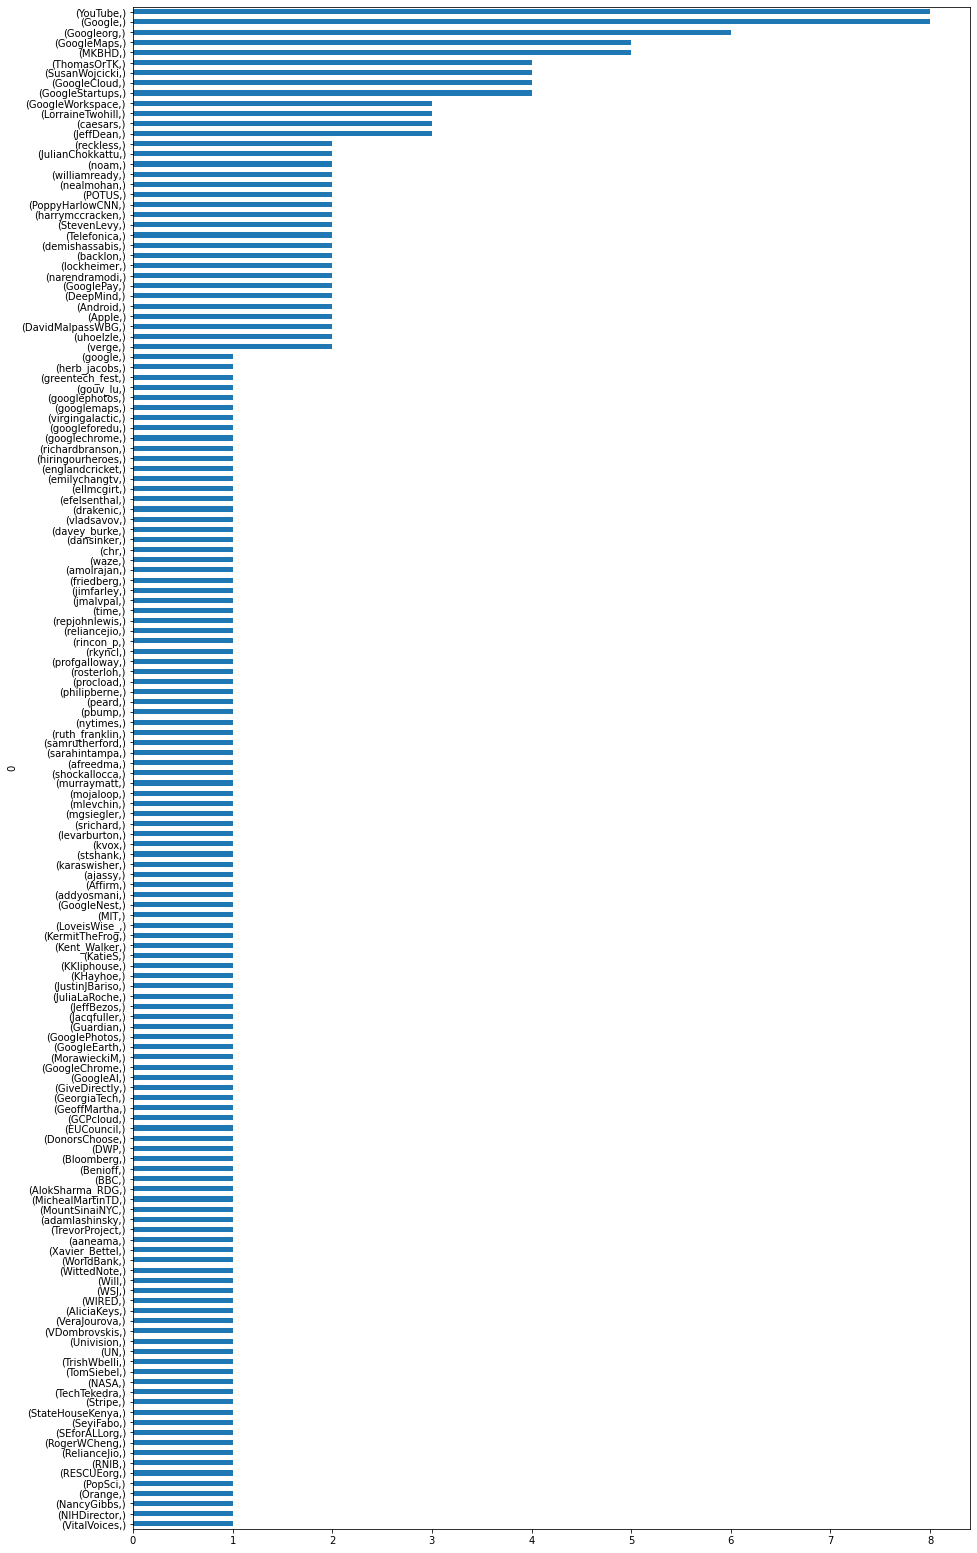

In [95]:
pd_sundar_mentioned = pd.DataFrame(sundar_mentioned) # convert the list into a pandas data frame
pd_sundar_mentioned.value_counts().plot.barh(figsize=(15,28)) # plot a horizontal bar chart
plt.gca().invert_yaxis()

In [96]:
tim_mentioned = get_mentioned_users('tim_cook') # get the mentioned users of Tim Cook

JasonSudeikis
TedLasso
ChristianSchafR
Malala
malinfezehai
MrsKylieCurtis
TedLasso
Canoopsy
RedGamesCo
encircle
Naomi_NYC
Marahml
TheShineApp
ICPhotog
AFB
TedLasso
iJustine
kurtfearnley
Aundrelarrow
EPAMichaelRegan
Lisapjackson
DSTNHome
HousingTrustSV
CalHFA
CreateNow
GuillaumeRozier
ViteMaDose_off
TheAmandaGorman
Malala
GayleKing
Malala
umichsph
OhioState
UltimateEditor
DenmarkTechSC
lisapjackson
MalalaFund
AppStore
SebastianYatra
GirlsWhoCode
StevieWonder
ACBnational
AppleNews
Money
Money
CoachGusMalzahn
coachbrucepearl
Caribu
HEB
ShineText
GallaudetU
ippawards
voguemagazine
ChefJoseAndres
WCKitchen
FeedingAmerica
AppStore
repjohnlewis
JohnLegend
Hozier
DSTNHome
PathPartners
GoldenGlobes


Next, we see Tim Cook's most mentioned users. Malala and TedLasso are the most mentioned and taking into account the rest of his most mentioned users,we are led to believe that unlike his peer Pichai; Cook interacts far more frequently with Twitter personalities rather than companies.

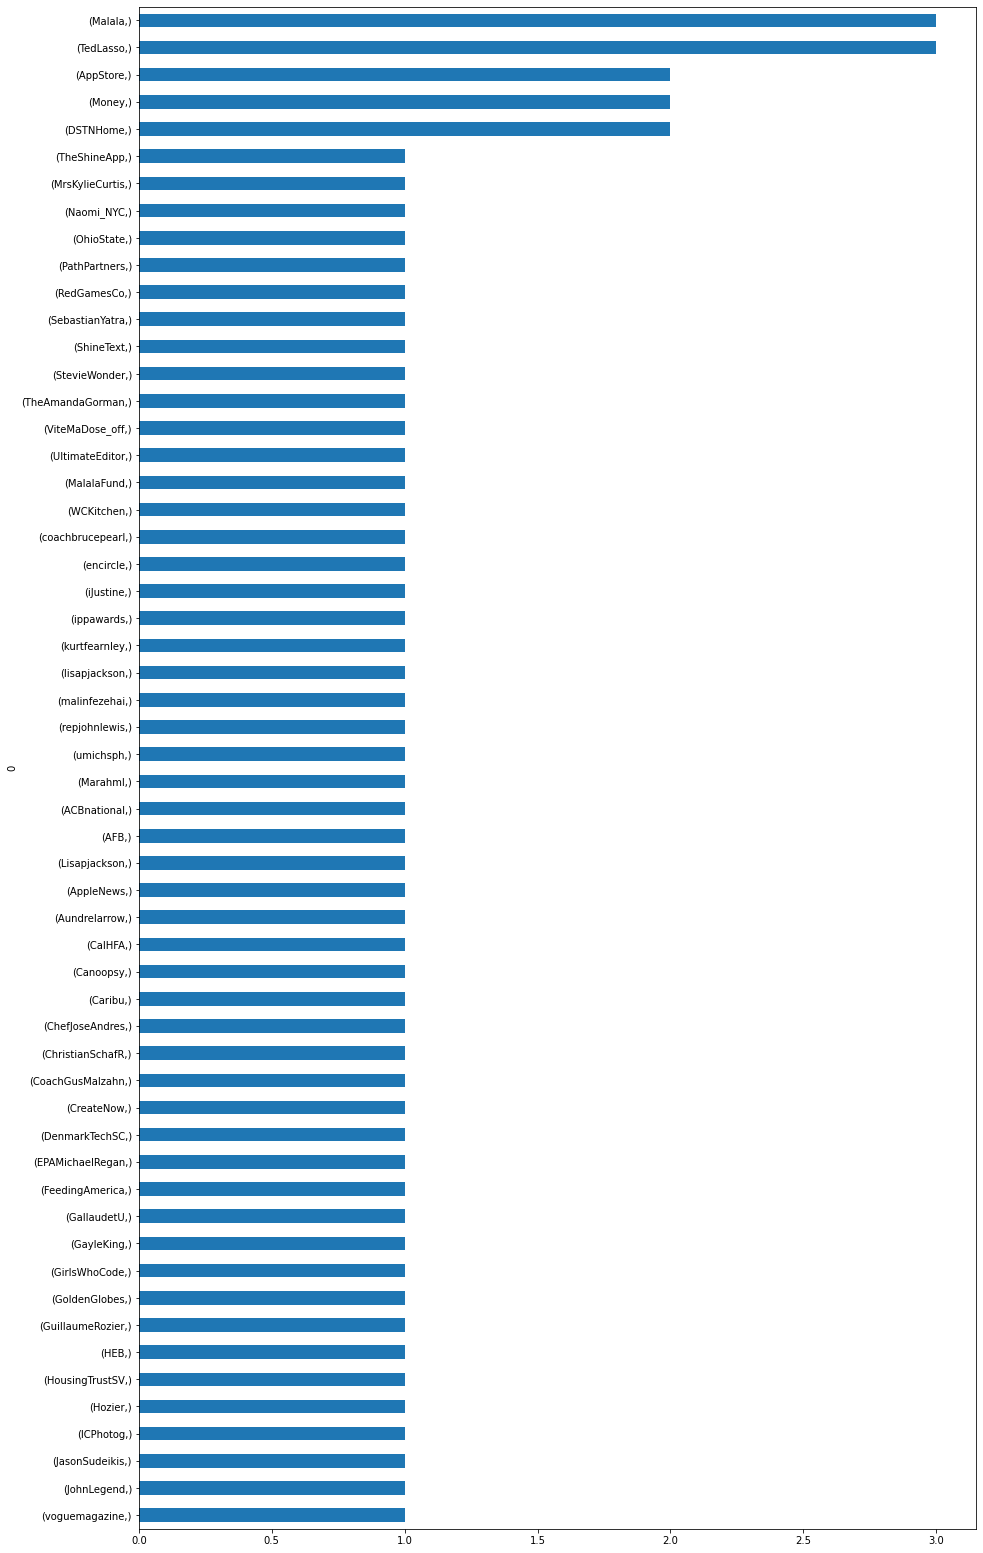

In [97]:
pd_tim_mentioned = pd.DataFrame(tim_mentioned) # convert the list into a pandas data frame
pd_tim_mentioned.value_counts().plot.barh(figsize=(15,28)) # plot a horizontal bar chart
plt.gca().invert_yaxis()

In [103]:
satya_mentioned = get_mentioned_users('satyanadella') # get the mentioned users of Satya Nadella

judsonalthoff
Kyndryl
ForzaHorizon
MSFTImagine
Microsoft
BradSmi
Windows
judsonalthoff
Lindsay_Rae_M
Microsoft
Microsoft
MSFTGarage
Windows
Acer
MichaelDell
WalterIsaacson
RayDalio
ericschmidt
IndraNooyi
richardbranson
HowardSchultz
Benioff
Truveta
scottgu
BradSmi
Mi
Windows
kaifulee
kaifulee
ChenQiufan
judsonalthoff
WellsFargo
Azure
XboxWire
SpecialOlympics
Windows
Windows
Windows
Windows
ASUS
POTUS
HPE
manikgupta
Microsoft
judsonalthoff
BradSmi
coalition_dream
jeffteper
judsonalthoff
Microsoft
Bucks
_MAnant
RebaSackett
MrAhmadAwais
Microsoft
lucasjoppa
Microsoft
cristianoamon
Microsoft
Azure
ajohnsocyber
LiatBenZur
MicrosoftEDU
XboxP
SecRaimondo
SelectUSA
SecRaimondo
MorganStanley
Microsoft
msdev
amandaksilver
MarsGlobal
judsonalthoff
Microsoft
WPP
Microsoft
judsonalthoff
Microsoft
panos_panay
Windows
BradSmi
CNET
BradSmi
MicrosoftEdge
panos_panay
NuanceInc
Microsoft
darrenwalker
Microsoft
github
Microsoft
MalaAnand_
AmadeusITGroup
Lindsay_Rae_M
Microsoft
BillGates
BradSmi
BradSmi
VW

Satya Nadella's most mentioned account is Microsoft which is expected as he is the CEO of Microsoft Corporation. Similar conclusions as those drawn for Tim Cook's most mentioned users can be made for Nadella's most mentioned users since they both interact with many Twitter personalities as well as company accounts. This means that Cook and Nadella use Twitter for its initial intended purpose, socialising, more than Pichai who seems to prefer to use his account to promote his company.


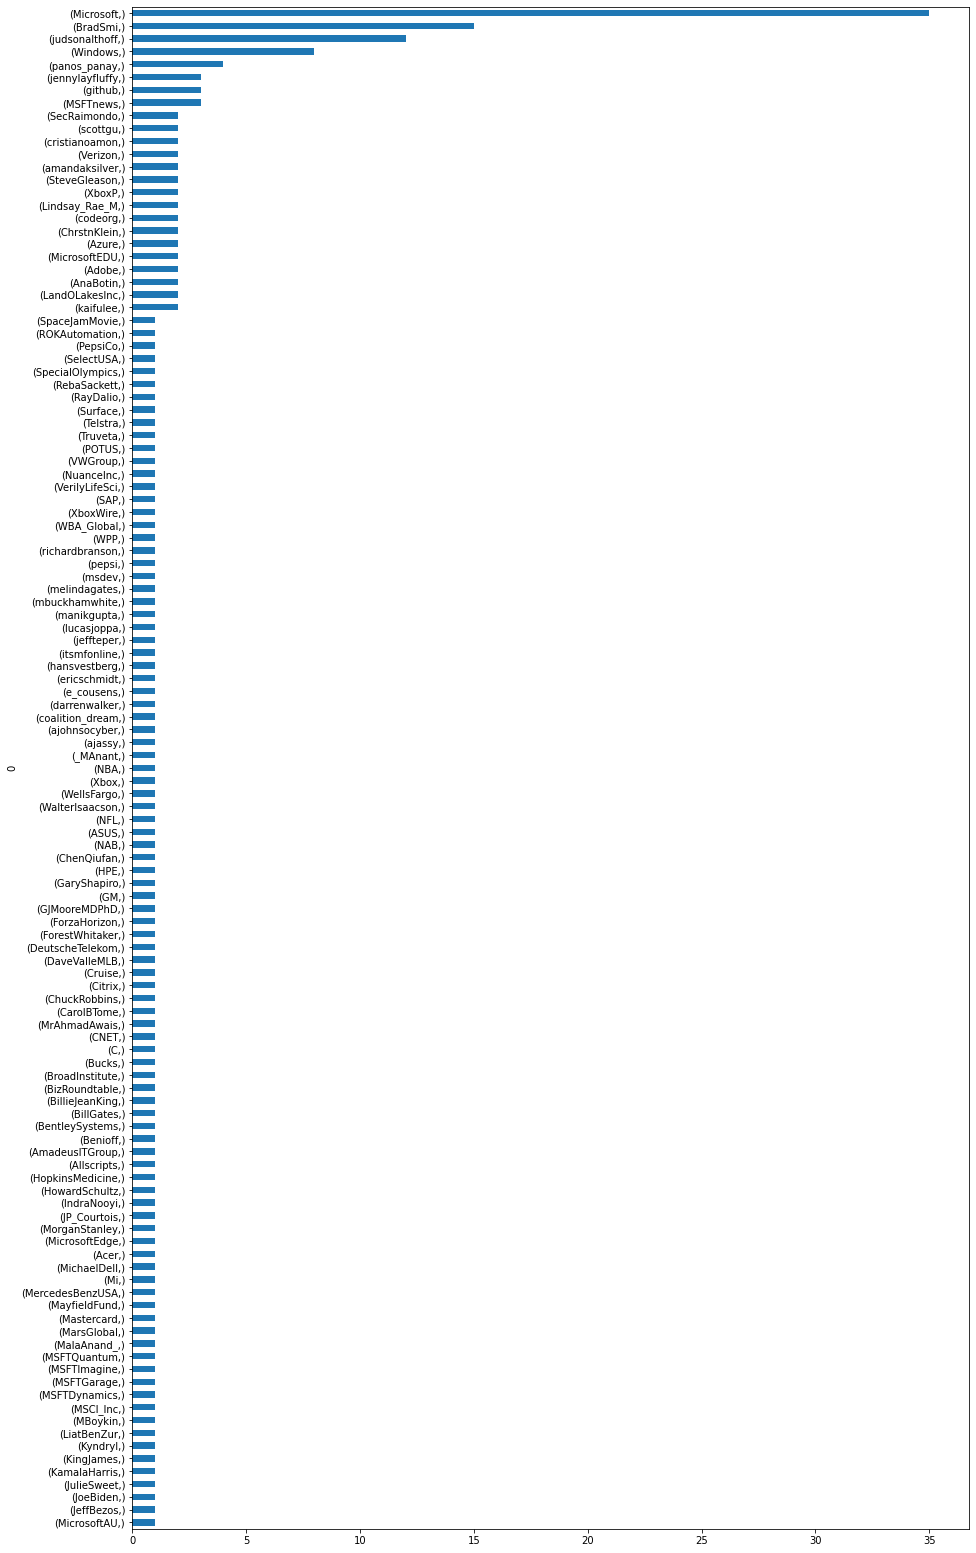

In [104]:
pd_satya_mentioned = pd.DataFrame(satya_mentioned) # convert the list into a pandas data frame
pd_satya_mentioned.value_counts().plot.barh(figsize=(15,28)) # plot a horizontal bar chart
plt.gca().invert_yaxis()

We use the intersection() method after converting the lists to sets, in order to check whether the users have any common mentioned accounts. The results show that 
 - Tim Cook and Sundar Pichai have both mentioned the account repjohnlewis. 
 - Tim Cook and Satya Nadella have no mentioned accounts in common.
 - Satya Nadella and Sundar Pichai have both mentioned the accounts Benioff, JeffBezos, POTUS, ajassy and richardbranson.

In [100]:
set(tim_mentioned).intersection(set(sundar_mentioned)) # intersection of tim_mentioned and sundar_mentioned

{'repjohnlewis'}

In [101]:
set(tim_mentioned).intersection(set(satya_mentioned)) # intersection of tim_mentioned and satya_mentioned

set()

In [106]:
set(satya_mentioned).intersection(set(sundar_mentioned)) # intersection of satya_mentioned and sundar_mentioned

{'Benioff', 'JeffBezos', 'POTUS', 'ajassy', 'richardbranson'}

Finishing the exploratory data analysis, we have a look at the date each account was created by fetching the created_at attrubute for each user and displaying the results in a bar chart. Sundar Pichai's account was created first and Satya Nadella's account was created roughly a year later. Last one to create an account was Tim Cook. Although Cook was the last one to create his account, he has the biggest follower count and owns the the majority of the top most liked and retweeted tweets. Satya Nadella's account is the least popular account in all observed aspects which proves that the creation date of an account has no correlation with the account's popularity as he was the second one to create his account. The aforementioned claim is further supported by Sundar Pichai's account which was the first one created and yet ended up with the second highest follower count and the top most liked and retweeted tweets. 

In [37]:
# compare the dates that the 3 twitter accounts were created
date_time1 = str(user1.created_at)
date1 = date_time1.split()[0]

date_time2 = str(user2.created_at)
date2 = date_time2.split()[0]

date_time3 = str(user3.created_at)
date3 = date_time3.split()[0]

In [35]:
print('Satya Nadella account creation date and time: ', date_time1)

Satya Nadella account creation date and time:  2009-02-11 04:45:34+00:00


In [39]:
print('Tim Cook account creation date and time: ', date_time2)

Tim Cook account creation date and time:  2013-07-31 22:41:25+00:00


In [40]:
print('Sundar Pichai account creation date and time: ', date_time3)

Sundar Pichai account creation date and time:  2008-03-12 05:51:53+00:00


# Network Analysis

The Network Analysis shows the many ways that a network is connected

The shortest_path function calculates the shortest possible series of edges and nodes which stand between any two nodes. This is useful especially for large network visualisations as it is harder to see otherwise.
The shortest path can be used to establish who is a friend-of-friends.
There may be more than one shortest possible path but the function only returns one way.

In [90]:
#Shortest Path
def shortest_path(graph):
    print(f"Shortest Path: {nx.shortest_path(graph)}")

In order to visualise the degree distribution of the nodes, we plot a histogram with the degree_histogram function.

In [91]:
#Degree Distribution
def degree_distribution(graph):
    print(f"\nDegree Distribution: ")

    plt.bar(range(0,len(nx.degree_histogram(graph))),nx.degree_histogram(graph))
    plt.xlabel("Degree")
    plt.ylabel("Frequency")

The Clustering Coefficient measures how connected a node's neighbors are to one another.

In [92]:
#Cluster Coefficient
def cluster_coefficient(graph):
    user_cc = nx.clustering(graph)

    print(f"\nCluster Coeffiecient: {user_cc}")

    plt.hist(list(user_cc.values()),bins=7)
    plt.ylabel("Frequency")
    plt.xlabel("Clustering coeff.")

Betweenness centrality measures the number of times a node lies on the shortest path between other nodes.

In [93]:
#Betweeness Centrality
def betweeneness_centrality(graph):
    print(f"\nBetweeneness Centrality: {nx.betweenness_centrality(graph)}")

We compute the degree assortativity of the graph using the degree_assortativity_coefficient.

What assortativity measures is the similarity of connections in the graph with respect to the node degree. A negative or low value assortativity shows lack of similarity in connections.

In [94]:
#Assortativity
def assortativity(graph):
    print(f"\nAssortativity: {nx.degree_assortativity_coefficient(graph)}")

In [50]:
def display_network_info(G):
    
    # General info of the network 
    print('\033[1m', "Some general info of the network", '\033[0m') # bold formatting is used

    
    print(f"Number of Nodes: {G.number_of_nodes()}, Number of Edges: {G.number_of_edges()}")
    print(f"The nodes are: {G.nodes()}")
    
    
    # Properties of the network
    print('\033[1m', "\nSome properties of the network", '\033[0m') # bold formatting is used

    # Degrees
    degrees = []

    for n in G.nodes(): 
        degrees.append(nx.degree(G,n))
    print(f"Degrees of each node: {degrees}")
    
    
    print(f"The maximum degree of all nodes is: {max(degrees)}")
    print(f"The minimum degree of all nodes is: {min(degrees)}")

    print(f"The average of degrees is: {sum(degrees)/len(degrees)}\n")

    
    # Connected components
    print(f"Connected components: {nx.number_connected_components(G)}")

    # Diameter
    if nx.is_connected(G):
        print(f"Diameter: {nx.diameter(G)}")
    else:  # in case the final graph has got networks of the 3 users which are not connected
        print("Graph not connected: infinite path length")

In [51]:
# just display the network visually

def display_network_visually(df_network, num1, num2):
    
    G = nx.from_pandas_edgelist(df_network, 'source', 'target') # turn df into graph
    pos = nx.spring_layout(G) # specify layout for visual
    
    f, ax = plt.subplots(figsize=(num1, num2))
    plt.style.use('ggplot')
    
    nodes = nx.draw_networkx_nodes(G, pos, alpha=0.8)
    nodes.set_edgecolor('k')
    
    nx.draw_networkx_labels(G, pos, font_size=8)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.2)
    
    
    
    display_network_info(G) # call the function to display network information
    
    return G

 This function creates a dataframe with two columns,source and target for each user that is called.Therefore, each user will have their own dataframe with the source column filled with only their username and the target column with all their different friends.

In [52]:
def find_friends(username):

    source=[]
    friends=[]

    for friend in tweepy.Cursor(api.get_friends, screen_name=username).items(10):
        source.append(username)
        friends.append(friend.screen_name)

    sleep_on_rate_limit=False

    df_network = pd.DataFrame(columns=['source','target']) # empty DataFrame
    
    df_network['source'] = source # set the username of the user as the source 
    df_network['target'] = friends # set the list of followers as the target column
    
    graph = display_network_visually(df_network, 10, 10) # call function to display the network
    
    return friends,df_network,graph

## Satya Nadella's Network

 Some general info of the network 
Number of Nodes: 11, Number of Edges: 10
The nodes are: ['satyanadella', 'yusuf_i_mehdi', 'Carmine_DiSibio', 'cristianoamon', 'jlzander', 'LiatBenZur', 'SecRaimondo', 'AlysaTaylorMSFT', 'lucasjoppa', 'thomasbuberl', 'NuanceInc']
 
Some properties of the network 
Degrees of each node: [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The maximum degree of all nodes is: 10
The minimum degree of all nodes is: 1
The average of degrees is: 1.8181818181818181

Connected components: 1
Diameter: 2


/Users/savvia/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


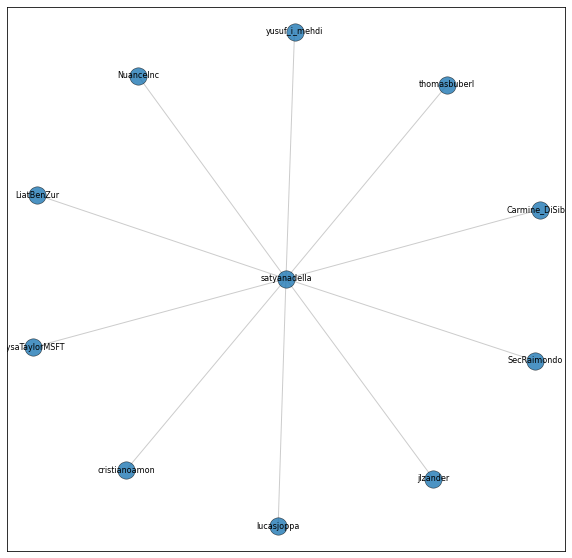

In [53]:
# Network of Satya Nadella

nadella_friends, nadella_network, nadella_graph = find_friends(username1)

In [54]:
# shortest path
shortest_path(nadella_graph)

Shortest Path: {'satyanadella': {'satyanadella': ['satyanadella'], 'yusuf_i_mehdi': ['satyanadella', 'yusuf_i_mehdi'], 'Carmine_DiSibio': ['satyanadella', 'Carmine_DiSibio'], 'cristianoamon': ['satyanadella', 'cristianoamon'], 'jlzander': ['satyanadella', 'jlzander'], 'LiatBenZur': ['satyanadella', 'LiatBenZur'], 'SecRaimondo': ['satyanadella', 'SecRaimondo'], 'AlysaTaylorMSFT': ['satyanadella', 'AlysaTaylorMSFT'], 'lucasjoppa': ['satyanadella', 'lucasjoppa'], 'thomasbuberl': ['satyanadella', 'thomasbuberl'], 'NuanceInc': ['satyanadella', 'NuanceInc']}, 'yusuf_i_mehdi': {'yusuf_i_mehdi': ['yusuf_i_mehdi'], 'satyanadella': ['yusuf_i_mehdi', 'satyanadella'], 'Carmine_DiSibio': ['yusuf_i_mehdi', 'satyanadella', 'Carmine_DiSibio'], 'cristianoamon': ['yusuf_i_mehdi', 'satyanadella', 'cristianoamon'], 'jlzander': ['yusuf_i_mehdi', 'satyanadella', 'jlzander'], 'LiatBenZur': ['yusuf_i_mehdi', 'satyanadella', 'LiatBenZur'], 'SecRaimondo': ['yusuf_i_mehdi', 'satyanadella', 'SecRaimondo'], 'Alysa


Degree Distribution: 


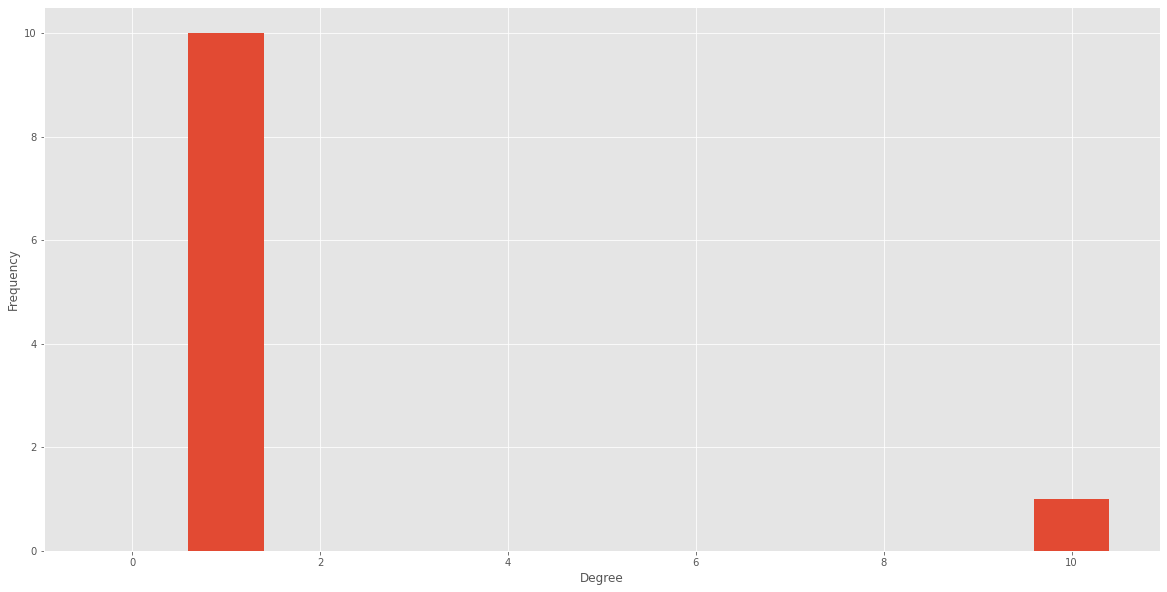

In [55]:
# degree distribution
degree_distribution(nadella_graph)


Cluster Coeffiecient: {'satyanadella': 0, 'yusuf_i_mehdi': 0, 'Carmine_DiSibio': 0, 'cristianoamon': 0, 'jlzander': 0, 'LiatBenZur': 0, 'SecRaimondo': 0, 'AlysaTaylorMSFT': 0, 'lucasjoppa': 0, 'thomasbuberl': 0, 'NuanceInc': 0}


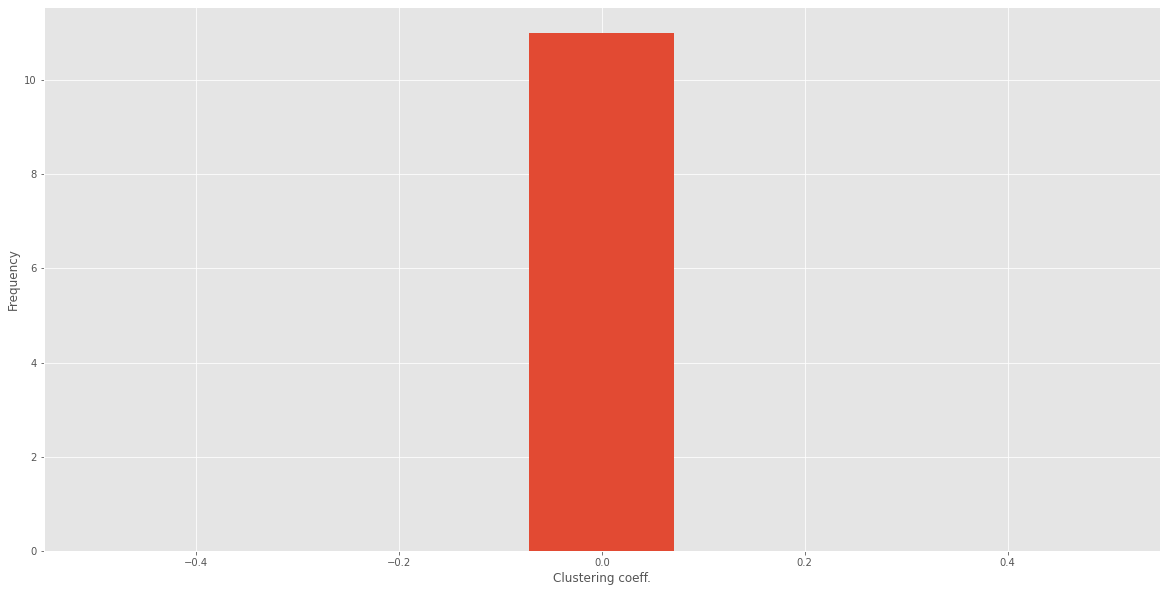

In [56]:
# cluster coefficient
cluster_coefficient(nadella_graph)

In [57]:
# betweeneness centrality
betweeneness_centrality(nadella_graph)


Betweeneness Centrality: {'satyanadella': 1.0, 'yusuf_i_mehdi': 0.0, 'Carmine_DiSibio': 0.0, 'cristianoamon': 0.0, 'jlzander': 0.0, 'LiatBenZur': 0.0, 'SecRaimondo': 0.0, 'AlysaTaylorMSFT': 0.0, 'lucasjoppa': 0.0, 'thomasbuberl': 0.0, 'NuanceInc': 0.0}


The assortativity is −1 which means the network is completely disassortative.

In [87]:
# assortativility
assortativity(nadella_graph)


Assortativity: -1.0


## Tim Cook's Network

 Some general info of the network 
Number of Nodes: 11, Number of Edges: 10
The nodes are: ['tim_cook', 'TedLasso', 'gregjoz', 'SahilBloom', 'finebaum', 'ReeseW', 'lloydblankfein', 'AppleArcade', 'octaviaspencer', 'MensHealthMag', 'LIVEpositivity']
 
Some properties of the network 
Degrees of each node: [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The maximum degree of all nodes is: 10
The minimum degree of all nodes is: 1
The average of degrees is: 1.8181818181818181

Connected components: 1
Diameter: 2


/Users/savvia/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


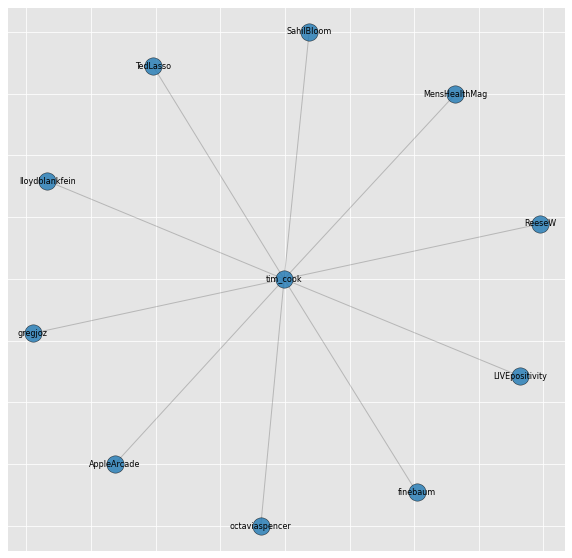

In [63]:
# Network of Tim Cook

cook_friends, cook_network, cook_graph = find_friends(username2)

In [64]:
# shortest path
shortest_path(cook_graph)

Shortest Path: {'tim_cook': {'tim_cook': ['tim_cook'], 'TedLasso': ['tim_cook', 'TedLasso'], 'gregjoz': ['tim_cook', 'gregjoz'], 'SahilBloom': ['tim_cook', 'SahilBloom'], 'finebaum': ['tim_cook', 'finebaum'], 'ReeseW': ['tim_cook', 'ReeseW'], 'lloydblankfein': ['tim_cook', 'lloydblankfein'], 'AppleArcade': ['tim_cook', 'AppleArcade'], 'octaviaspencer': ['tim_cook', 'octaviaspencer'], 'MensHealthMag': ['tim_cook', 'MensHealthMag'], 'LIVEpositivity': ['tim_cook', 'LIVEpositivity']}, 'TedLasso': {'TedLasso': ['TedLasso'], 'tim_cook': ['TedLasso', 'tim_cook'], 'gregjoz': ['TedLasso', 'tim_cook', 'gregjoz'], 'SahilBloom': ['TedLasso', 'tim_cook', 'SahilBloom'], 'finebaum': ['TedLasso', 'tim_cook', 'finebaum'], 'ReeseW': ['TedLasso', 'tim_cook', 'ReeseW'], 'lloydblankfein': ['TedLasso', 'tim_cook', 'lloydblankfein'], 'AppleArcade': ['TedLasso', 'tim_cook', 'AppleArcade'], 'octaviaspencer': ['TedLasso', 'tim_cook', 'octaviaspencer'], 'MensHealthMag': ['TedLasso', 'tim_cook', 'MensHealthMag'],


Degree Distribution: 


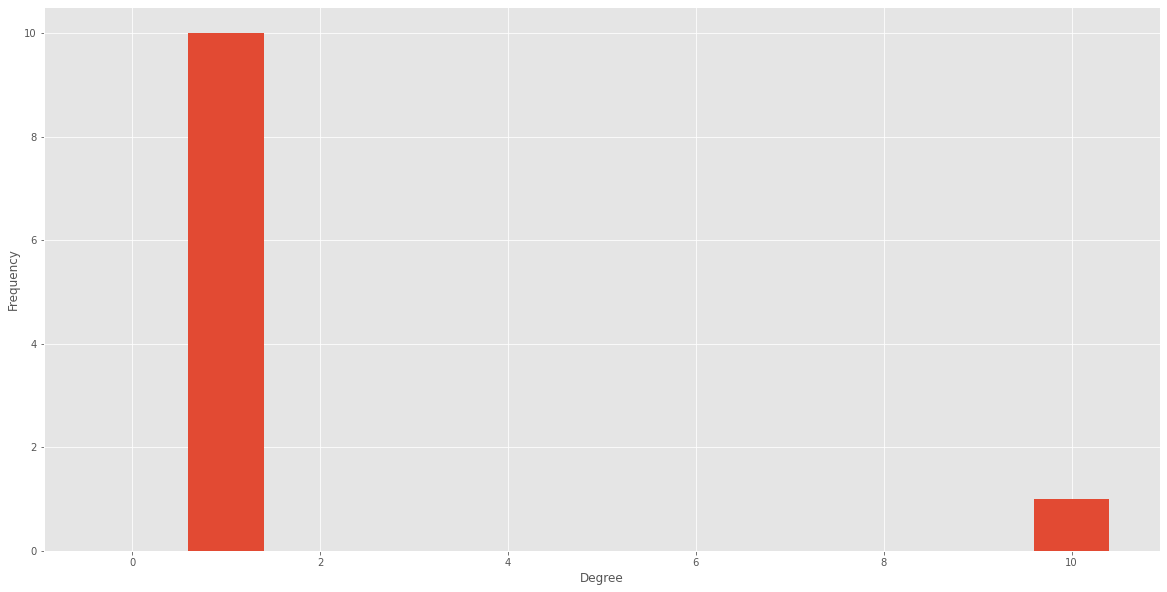

In [65]:
# degree distribution
degree_distribution(cook_graph)


Cluster Coeffiecient: {'tim_cook': 0, 'TedLasso': 0, 'gregjoz': 0, 'SahilBloom': 0, 'finebaum': 0, 'ReeseW': 0, 'lloydblankfein': 0, 'AppleArcade': 0, 'octaviaspencer': 0, 'MensHealthMag': 0, 'LIVEpositivity': 0}


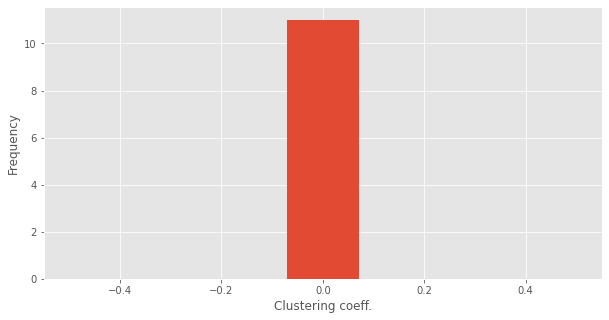

In [134]:
# cluster coefficient
cluster_coefficient(cook_graph)

In [135]:
# betweeneness centrality
betweeneness_centrality(cook_graph)


Betweeneness Centrality: {'tim_cook': 1.0, 'TedLasso': 0.0, 'gregjoz': 0.0, 'SahilBloom': 0.0, 'finebaum': 0.0, 'ReeseW': 0.0, 'lloydblankfein': 0.0, 'AppleArcade': 0.0, 'octaviaspencer': 0.0, 'MensHealthMag': 0.0, 'LIVEpositivity': 0.0}


The assortativity is −1 which means the network is completely disassortative.

In [88]:
# Assortativity
assortativity(cook_graph)


Assortativity: -1.0


## Sundar Pichai's Network

 Some general info of the network 
Number of Nodes: 11, Number of Edges: 10
The nodes are: ['sundarpichai', 'philvenables', 'vijaypande', 'TechTekedra', 'RobertEnslin', 'KKliphouse', 'ThomasOrTK', 'lexfridman', 'COVID19Tracking', 'YouTubeIndia', 'GoogleIndia']
 
Some properties of the network 
Degrees of each node: [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The maximum degree of all nodes is: 10
The minimum degree of all nodes is: 1
The average of degrees is: 1.8181818181818181

Connected components: 1
Diameter: 2


/Users/savvia/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


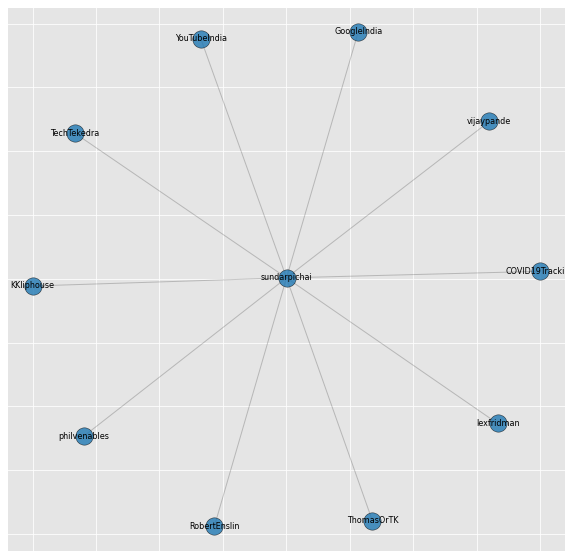

In [67]:
# Network of Sundar Pichai

pichai_friends, pichai_network, pichai_graph = find_friends(username3)

In [68]:
# shortest path
shortest_path(pichai_graph)

Shortest Path: {'sundarpichai': {'sundarpichai': ['sundarpichai'], 'philvenables': ['sundarpichai', 'philvenables'], 'vijaypande': ['sundarpichai', 'vijaypande'], 'TechTekedra': ['sundarpichai', 'TechTekedra'], 'RobertEnslin': ['sundarpichai', 'RobertEnslin'], 'KKliphouse': ['sundarpichai', 'KKliphouse'], 'ThomasOrTK': ['sundarpichai', 'ThomasOrTK'], 'lexfridman': ['sundarpichai', 'lexfridman'], 'COVID19Tracking': ['sundarpichai', 'COVID19Tracking'], 'YouTubeIndia': ['sundarpichai', 'YouTubeIndia'], 'GoogleIndia': ['sundarpichai', 'GoogleIndia']}, 'philvenables': {'philvenables': ['philvenables'], 'sundarpichai': ['philvenables', 'sundarpichai'], 'vijaypande': ['philvenables', 'sundarpichai', 'vijaypande'], 'TechTekedra': ['philvenables', 'sundarpichai', 'TechTekedra'], 'RobertEnslin': ['philvenables', 'sundarpichai', 'RobertEnslin'], 'KKliphouse': ['philvenables', 'sundarpichai', 'KKliphouse'], 'ThomasOrTK': ['philvenables', 'sundarpichai', 'ThomasOrTK'], 'lexfridman': ['philvenables'


Degree Distribution: 


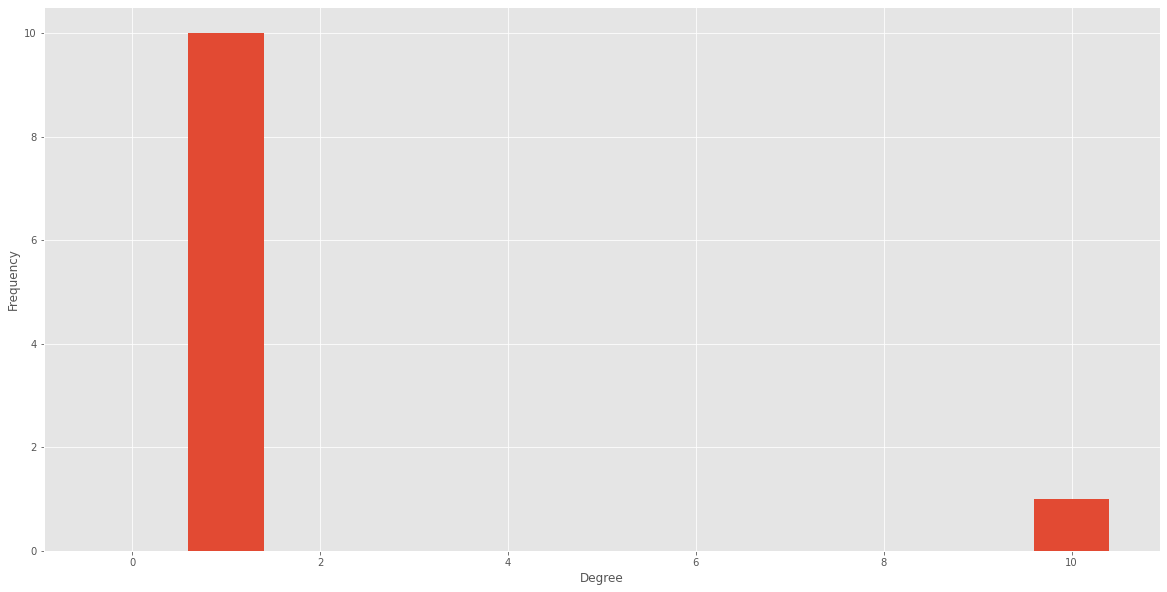

In [69]:
# degree distribution
degree_distribution(pichai_graph)


Cluster Coeffiecient: {'sundarpichai': 0, 'philvenables': 0, 'vijaypande': 0, 'TechTekedra': 0, 'RobertEnslin': 0, 'KKliphouse': 0, 'ThomasOrTK': 0, 'lexfridman': 0, 'COVID19Tracking': 0, 'YouTubeIndia': 0, 'GoogleIndia': 0}


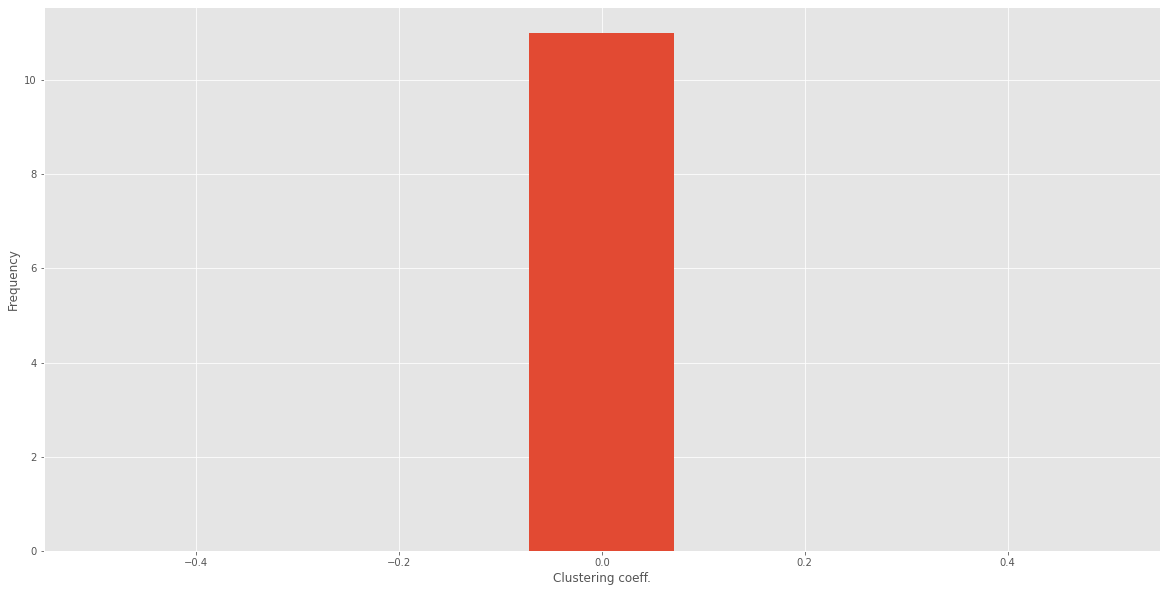

In [70]:
# cluster coefficient
cluster_coefficient(pichai_graph)

In [71]:
# betweeneness centrality
betweeneness_centrality(pichai_graph)


Betweeneness Centrality: {'sundarpichai': 1.0, 'philvenables': 0.0, 'vijaypande': 0.0, 'TechTekedra': 0.0, 'RobertEnslin': 0.0, 'KKliphouse': 0.0, 'ThomasOrTK': 0.0, 'lexfridman': 0.0, 'COVID19Tracking': 0.0, 'YouTubeIndia': 0.0, 'GoogleIndia': 0.0}


The assortativity is −1 which means the network is completely disassortative.

In [89]:
# Assortativity
assortativity(pichai_graph)


Assortativity: -1.0


In [73]:
# check if our 3 users have any friends in common

def check_common_friends(mutual_friends, users):
    user1,user2 = users.split(' ', 1)
    
    isEmpty = (len(mutual_friends) == 0) # check if they have any common friends
    
    
    if isEmpty:
        print(user1 ,"and", user2 ,"have no mutual friends")
    else:
        print(user1 ,"and", user2 ,"have mutual friends")

The intersection() method returns a set that contains the similarity between two or more sets. As a result, the returned set contains only items that exist in both sets
#### Therefore, we will be able to know whether any two users have any friends in common.

In [74]:
# converts lists to sets
a = set(nadella_friends)
b = set(cook_friends)
c = set(pichai_friends)


# intersections of sets
nadella_cook = set(a & b)
nadella_pichai = set(a & c)  
cook_pichai = set(b & c)

In [75]:
# check if Nadella and Cook have any friends in common

check_common_friends(nadella_cook, "Nadella Cook")

Nadella and Cook have no mutual friends


In [76]:
# check if Nadella and Pichai have any friends in common

check_common_friends(nadella_pichai, "Nadella Pichai")

Nadella and Pichai have no mutual friends


In [77]:
# check if Cook and Pichai have any friends in common

check_common_friends(cook_pichai, "Cook Pichai")

Cook and Pichai have no mutual friends


## Final Overall Network

We concatenate the first column of each user's network dataframe with itertools.chain() method and convert it to a list.
We apply the same method to the second column of each user's network dataframe.
The reason why we do this is we want to have all 3 different columns of source column of each user combined as well as the target column.
Therefore, we add the overall source and target lists to the final network's source and target columns respectively.


/Users/savvia/.local/lib/python3.8/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


 Some general info of the network 
Number of Nodes: 33, Number of Edges: 30
The nodes are: ['satyanadella', 'yusuf_i_mehdi', 'Carmine_DiSibio', 'cristianoamon', 'jlzander', 'LiatBenZur', 'SecRaimondo', 'AlysaTaylorMSFT', 'lucasjoppa', 'thomasbuberl', 'NuanceInc', 'tim_cook', 'TedLasso', 'gregjoz', 'SahilBloom', 'finebaum', 'ReeseW', 'lloydblankfein', 'AppleArcade', 'octaviaspencer', 'MensHealthMag', 'LIVEpositivity', 'sundarpichai', 'philvenables', 'vijaypande', 'TechTekedra', 'RobertEnslin', 'KKliphouse', 'ThomasOrTK', 'lexfridman', 'COVID19Tracking', 'YouTubeIndia', 'GoogleIndia']
 
Some properties of the network 
Degrees of each node: [10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The maximum degree of all nodes is: 10
The minimum degree of all nodes is: 1
The average of degrees is: 1.8181818181818181

Connected components: 3
Graph not connected: infinite path length


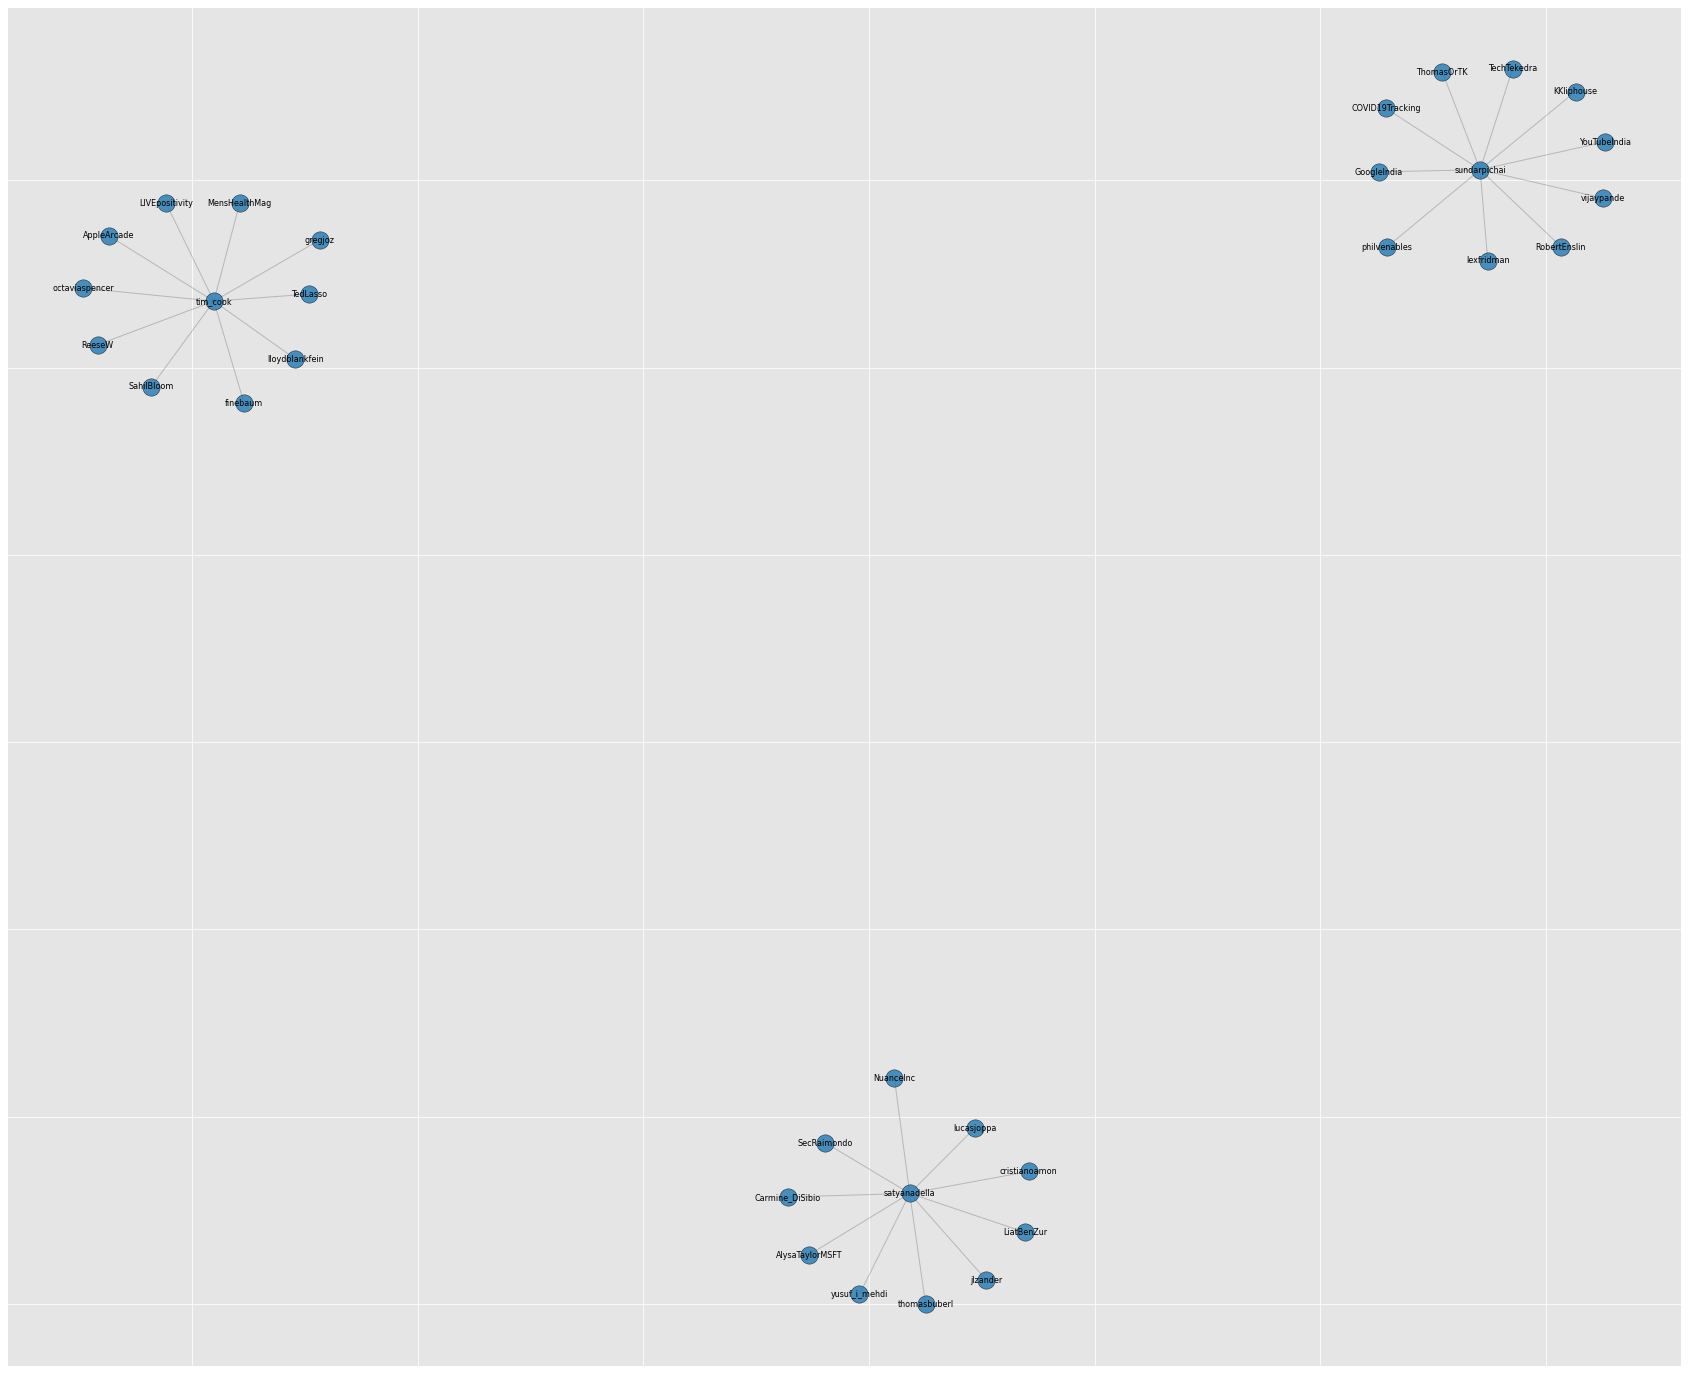

In [78]:
final_network = pd.DataFrame(columns=['source','target']) # empty DataFrame


source = list(itertools.chain(nadella_network['source'], cook_network['source'], pichai_network['source'])) 

target = list(itertools.chain(nadella_network['target'], cook_network['target'], pichai_network['target'])) 


final_network['source'] = source # set the username of the user as the source 
final_network['target'] = target # set the list of followers as the target column

final_graph = display_network_visually(final_network, 30, 25) # call function to display the network

In each one of the three mini networks that make up the main network, the shortest path between the nodes is always an external node,the egde and the node of the influencer. This shows us that the external nodes of the networks are not connected with each other and therefore do not share any friend-of-friends other than the influencer they follow. The mini networks are not connected with each other and therefore they do not have shortest paths between them.
If we were to take a much larger amount of users from the following list, we would potentially find a shortest path between Tim Cook and Sundar Pichai and Tim Cook and Satya Nadella as Cook follows them both.

In [79]:
# shortest path
shortest_path(final_graph)

Shortest Path: {'satyanadella': {'satyanadella': ['satyanadella'], 'yusuf_i_mehdi': ['satyanadella', 'yusuf_i_mehdi'], 'Carmine_DiSibio': ['satyanadella', 'Carmine_DiSibio'], 'cristianoamon': ['satyanadella', 'cristianoamon'], 'jlzander': ['satyanadella', 'jlzander'], 'LiatBenZur': ['satyanadella', 'LiatBenZur'], 'SecRaimondo': ['satyanadella', 'SecRaimondo'], 'AlysaTaylorMSFT': ['satyanadella', 'AlysaTaylorMSFT'], 'lucasjoppa': ['satyanadella', 'lucasjoppa'], 'thomasbuberl': ['satyanadella', 'thomasbuberl'], 'NuanceInc': ['satyanadella', 'NuanceInc']}, 'yusuf_i_mehdi': {'yusuf_i_mehdi': ['yusuf_i_mehdi'], 'satyanadella': ['yusuf_i_mehdi', 'satyanadella'], 'Carmine_DiSibio': ['yusuf_i_mehdi', 'satyanadella', 'Carmine_DiSibio'], 'cristianoamon': ['yusuf_i_mehdi', 'satyanadella', 'cristianoamon'], 'jlzander': ['yusuf_i_mehdi', 'satyanadella', 'jlzander'], 'LiatBenZur': ['yusuf_i_mehdi', 'satyanadella', 'LiatBenZur'], 'SecRaimondo': ['yusuf_i_mehdi', 'satyanadella', 'SecRaimondo'], 'Alysa

A degree distribution is a frequency count of the occurence of each degree. The degree of a node reflects how many connections the node has. As we can see in the histogram below, the degree of 1 is repeated 30 times(frequency) in the network and having observed the topology of our main network, this makes perfect sense as the external nodes of each mini network all have only 1 degree which represents a connection. The internal nodes which represent the influencers we are investigating have a degree of 10 and therefore the frequency is 3. A degree distribution is a simple measure that sheds light on the connectivity of a network. If we were to only look at the histogram we would immediately realise that there are 3 users with 10 degrees(connections) and 30 users with one degree so the latter users are far less connected within the network than the former.


Degree Distribution: 


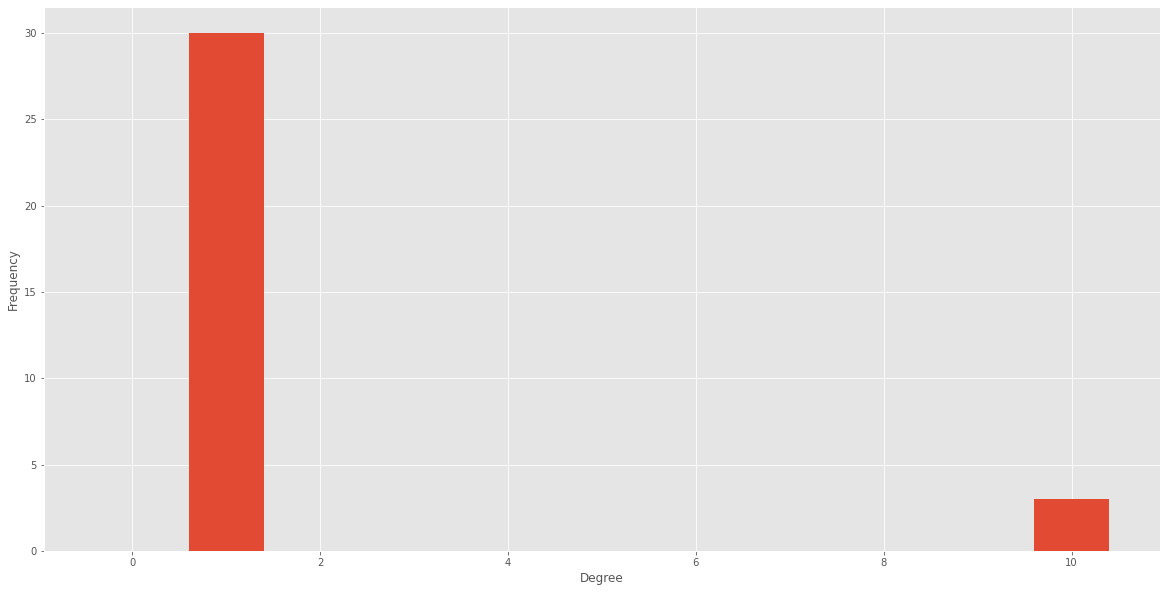

In [80]:
# degree distribution
degree_distribution(final_graph)

The cluster coefficient measures the degree that nodes in our network tend to cluster together. The cluster coefficient value is between 0 and 1 with 0 indicating low degrees and therefore a low or nonexistent tendency to form clusters. Clusters help in categorising accounts in a network and tying them together to create close knit communities that share interests in social network platforms. The dataset we are working with has no clusters and all values are zero which is predictable as the most that each following list has been recorded to have in common is the influencer they follow.


Cluster Coeffiecient: {'satyanadella': 0, 'yusuf_i_mehdi': 0, 'Carmine_DiSibio': 0, 'cristianoamon': 0, 'jlzander': 0, 'LiatBenZur': 0, 'SecRaimondo': 0, 'AlysaTaylorMSFT': 0, 'lucasjoppa': 0, 'thomasbuberl': 0, 'NuanceInc': 0, 'tim_cook': 0, 'TedLasso': 0, 'gregjoz': 0, 'SahilBloom': 0, 'finebaum': 0, 'ReeseW': 0, 'lloydblankfein': 0, 'AppleArcade': 0, 'octaviaspencer': 0, 'MensHealthMag': 0, 'LIVEpositivity': 0, 'sundarpichai': 0, 'philvenables': 0, 'vijaypande': 0, 'TechTekedra': 0, 'RobertEnslin': 0, 'KKliphouse': 0, 'ThomasOrTK': 0, 'lexfridman': 0, 'COVID19Tracking': 0, 'YouTubeIndia': 0, 'GoogleIndia': 0}


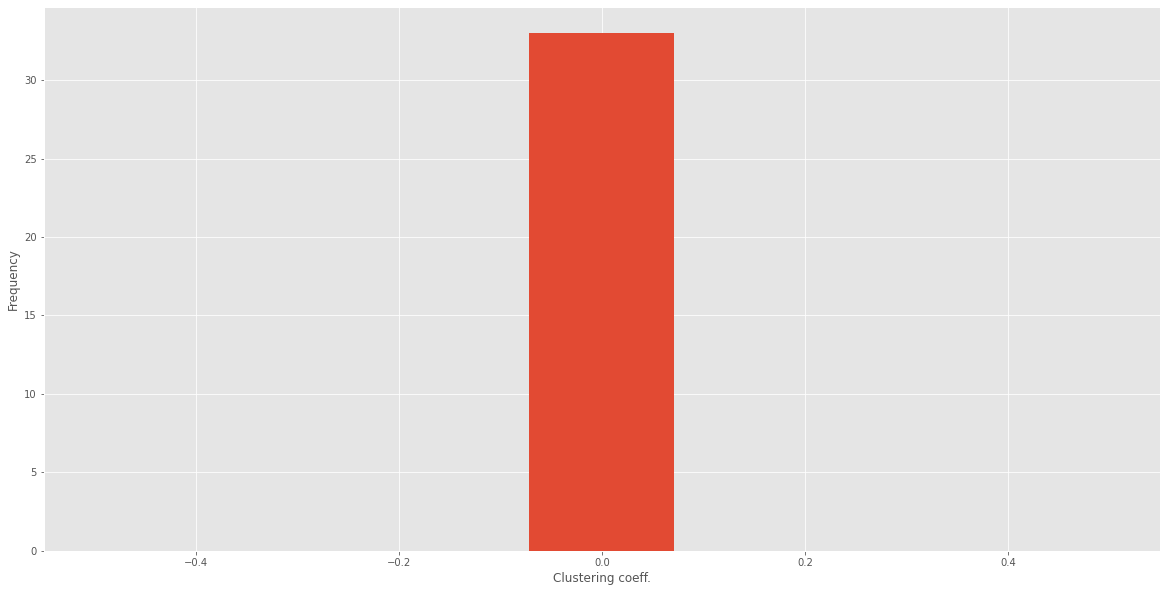

In [81]:
# cluster coefficient
cluster_coefficient(final_graph)

Betweeness centrality indicates which nodes act as bridges in a network by finding the shortest paths and counting how many times each node falls on these paths.What this tells us is which users influence the flow of the network.
This network is made up of three individual networks as they do not have any connections between them but the results of the betweeneness_centrality function in this section and the other sections shows us what we can already observe with the naked eye as the visualisation of our network is not complex; we can see that there is one person in each network that acts as the influence(as the value is not zero) and these are Tim Cook, Sundar Pichai and Satya Nadella.
It comes as no surprise as the intersection showed us that the influencers we selected have no mutual friends(in the data we collected). If the users from the following list of an influencer followed each other then this would be reflected in these results with values above zero and the more that this happens the more the network will start looking more connected and complex. This has not been possible to observe due to the small amount of data we used.

In [82]:
# betweeneness centrality
betweeneness_centrality(final_graph)


Betweeneness Centrality: {'satyanadella': 0.0907258064516129, 'yusuf_i_mehdi': 0.0, 'Carmine_DiSibio': 0.0, 'cristianoamon': 0.0, 'jlzander': 0.0, 'LiatBenZur': 0.0, 'SecRaimondo': 0.0, 'AlysaTaylorMSFT': 0.0, 'lucasjoppa': 0.0, 'thomasbuberl': 0.0, 'NuanceInc': 0.0, 'tim_cook': 0.0907258064516129, 'TedLasso': 0.0, 'gregjoz': 0.0, 'SahilBloom': 0.0, 'finebaum': 0.0, 'ReeseW': 0.0, 'lloydblankfein': 0.0, 'AppleArcade': 0.0, 'octaviaspencer': 0.0, 'MensHealthMag': 0.0, 'LIVEpositivity': 0.0, 'sundarpichai': 0.0907258064516129, 'philvenables': 0.0, 'vijaypande': 0.0, 'TechTekedra': 0.0, 'RobertEnslin': 0.0, 'KKliphouse': 0.0, 'ThomasOrTK': 0.0, 'lexfridman': 0.0, 'COVID19Tracking': 0.0, 'YouTubeIndia': 0.0, 'GoogleIndia': 0.0}


The assortativity is −1 which means the network is completely disassortative.

In [95]:
# Assortativity
assortativity(final_graph)


Assortativity: -1.0


# References

[1] https://en.wikipedia.org/wiki/Twitter

[2]Hedden, S. (2021). How to download and visualize your Twitter network. [online] Medium. Available at: https://towardsdatascience.com/how-to-download-and-visualize-your-twitter-network-f009dbbf107b.
‌

[3]Techie Delight. (2016). Check for an empty Set in Python. [online] Available at: https://www.techiedelight.com/check-for-empty-set-python/ [Accessed 29 Nov. 2021].
‌

[4]Anon, (2020). Ways to concatenate multiple lists in Python - AskPython. [online] Available at: https://www.askpython.com/python/list/concatenate-multiple-lists-in-python [Accessed 29 Nov. 2021].
‌